In [1]:
import numpy as np 
import pandas as pd 
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# paths
RESULTS_DIR = "./Results/"
DYADIC_COND = "Dyadic"
SINGLE_COND = "Single"
SINGLEC_COND = "SingleC"
EXPLORE_COND = "Exploration"

DYADIC_PAIR_MAP = { # Leader : Follower
    '1021' : '1022',
    '1023' : '1013',
    '1005' : '1055',
    '1074' : '1069',
    '1008' : '1058',
    '1054' : '1004',
    '1011' : '1017',
    '1018' : '1057'
}

UNIQUE_PATH_LABELS_A = {
    0 : "A_0",
    1 : "A_1_B_9",
    2 : "A_2_B_8",
    3 : "A_3_B_7",
    4 : "A_4_B_6",
    5 : "A_5_B_5",
    6 : "A_6_B_4",
    7 : "A_7_B_3",
    8 : "A_8_B_2",
    9 : "A_9_B_1",
}

UNIQUE_PATH_LABELS_B = {
    9 : "A_1_B_9",
    8 : "A_2_B_8",
    7 : "A_3_B_7",
    6 : "A_4_B_6",
    5 : "A_5_B_5",
    4 : "A_6_B_4",
    3 : "A_7_B_3",
    2 : "A_8_B_2",
    1 : "A_9_B_1",
    0 : "B_0"
}

SINGLE_PERF_PATH = "./Results/Single/Single_Performance_Analysis.csv"
SINGLEC_PERF_PATH = "./Results/SingleC/SingleC_Performance_Analysis.csv"
DYADIC_PERF_PATH = "./Results/Dyadic/Dyadic_Performance_Analysis.csv"


# Preprocessing

### Read interpolation CSVs

In [3]:
# read raw files 
interpolation_csv_dict = {}

for condition in [DYADIC_COND, SINGLE_COND, SINGLEC_COND, EXPLORE_COND]:
    
    # add main key if not present
    if not condition in interpolation_csv_dict:
        interpolation_csv_dict[condition] = {}
    
    # read list of files 
    path_cond = "." if condition == EXPLORE_COND else condition
    file_list = glob.glob(RESULTS_DIR + path_cond + "/*interpolation_df.csv")
    
    # load each file and add to dict 
    for file_path in file_list:
        
        # extract subject id 
        subject_id = int(file_path.split("/")[-1].split("_")[0])
        
        # read file 
        df = pd.read_csv(file_path)
        
        # add column for subject id and condition 
        df["subject_id"] = subject_id
        df["condition"] = condition
        
        # add to dict 
        interpolation_csv_dict[condition][subject_id] = df


###  Combine read CSVs into DataFrames for each condition 
Such that samples (and timediffs) are summed up per ColliderName for each individual PathNumber (or only ColliderName in case of the exploration). 

In [4]:
# create df for single pathfinding condition with summed up samples/ timediffs grouped by pathnumber and collidername 
single_cond_df = pd.DataFrame(columns=["PathNumber","ColliderName","Samples","timeDiff","subject_id"])

for subj_id in interpolation_csv_dict[SINGLE_COND].keys():
    curr_df = interpolation_csv_dict[SINGLE_COND][subj_id].groupby(["PathNumber","ColliderName"]).sum().drop(columns=["HMD_x","HMD_y","HMD_z","subject_id","Index"]).reset_index()
    curr_df["subject_id"] = subj_id
    single_cond_df = single_cond_df.append(curr_df)
    
single_cond_df = single_cond_df.reset_index(drop=True)


# create df for singlec pathfinding condition with summed up samples/ timediffs grouped by pathnumber and collidername 
singlec_cond_df = pd.DataFrame(columns=["PathNumber","ColliderName","Samples","timeDiff","subject_id"])

for subj_id in interpolation_csv_dict[SINGLEC_COND].keys():
    curr_df = interpolation_csv_dict[SINGLEC_COND][subj_id].groupby(["PathNumber","ColliderName"]).sum().drop(columns=["HMD_x","HMD_y","HMD_z","subject_id","Index"]).reset_index()
    curr_df["subject_id"] = subj_id
    singlec_cond_df = singlec_cond_df.append(curr_df)
    
singlec_cond_df = singlec_cond_df.reset_index(drop=True)


# create df for dyadic pathfinding condition with summed up samples/ timediffs grouped by pathnumber and collidername 
dyadic_cond_df = pd.DataFrame(columns=["PathNumber","ColliderName","Samples","timeDiff","subject_id"])

for subj_id in interpolation_csv_dict[DYADIC_COND].keys():
    curr_df = interpolation_csv_dict[DYADIC_COND][subj_id].groupby(["PathNumber","ColliderName"]).sum().drop(columns=["HMD_x","HMD_y","HMD_z","subject_id","Index"]).reset_index()
    curr_df["subject_id"] = subj_id
    dyadic_cond_df = dyadic_cond_df.append(curr_df)
    
dyadic_cond_df = dyadic_cond_df.reset_index(drop=True)


# create df for exploration condition with summed up samples/ timediffs grouped by collidername 
exploration_cond_df = pd.DataFrame(columns=["ColliderName","Samples","timeDiff","subject_id"])

for subj_id in interpolation_csv_dict[EXPLORE_COND].keys():
    curr_df = interpolation_csv_dict[EXPLORE_COND][subj_id].groupby(["ColliderName"]).sum().drop(columns=["HMD_x","HMD_y","HMD_z","subject_id","Index"]).reset_index()
    curr_df["subject_id"] = subj_id
    exploration_cond_df = exploration_cond_df.append(curr_df)
    
exploration_cond_df = exploration_cond_df.reset_index(drop=True)


print("Single Cond. Columns: " + str(single_cond_df.columns))
print("SingleC Cond. Columns: " + str(singlec_cond_df.columns))
print("Dyadic Cond. Columns: " + str(dyadic_cond_df.columns))
print("Exploration Cond. Columns: " + str(exploration_cond_df.columns))

Single Cond. Columns: Index(['PathNumber', 'ColliderName', 'Samples', 'timeDiff', 'subject_id'], dtype='object')
SingleC Cond. Columns: Index(['PathNumber', 'ColliderName', 'Samples', 'timeDiff', 'subject_id'], dtype='object')
Dyadic Cond. Columns: Index(['PathNumber', 'ColliderName', 'Samples', 'timeDiff', 'subject_id'], dtype='object')
Exploration Cond. Columns: Index(['ColliderName', 'Samples', 'timeDiff', 'subject_id'], dtype='object')


### Read additional meta info CSVs

In [5]:
single_performance_df = pd.read_csv(SINGLE_PERF_PATH)
single_perf_relevant = single_performance_df.drop(columns=single_performance_df.columns.difference(["SubjectID","Condition"])).rename(columns={"SubjectID":"subject_id","Condition":"start_point"})
singlec_performance_df = pd.read_csv(SINGLEC_PERF_PATH)
singlec_perf_relevant = singlec_performance_df.drop(columns=singlec_performance_df.columns.difference(["SubjectID","Condition"])).rename(columns={"SubjectID":"subject_id","Condition":"start_point"})
dyadic_performance_df = pd.read_csv(DYADIC_PERF_PATH)
dyadic_perf_relevant = dyadic_performance_df.drop(columns=dyadic_performance_df.columns.difference(["SubjectID","Condition","Leader?"])).rename(columns={"SubjectID":"subject_id","Condition":"start_point"})

print("Verify Dyadic Leaders & Followers")
print("Dyadic Leaders: \n" + str(dyadic_perf_relevant.loc[dyadic_perf_relevant["Leader?"], "subject_id"].tolist()))
print("Dyadic Followers: \n" + str(dyadic_perf_relevant.loc[~ dyadic_perf_relevant["Leader?"], "subject_id"].tolist()))
print()
print("Single Perf Relevant Columns: " + str(single_perf_relevant.columns.tolist()))
print("SingleC Perf Relevant Columns: " + str(singlec_perf_relevant.columns.tolist()))
print("Dyadic Perf Relevant Columns: " + str(dyadic_perf_relevant.columns.tolist()))



Verify Dyadic Leaders & Followers
Dyadic Leaders: 
[1005, 1008, 1011, 1018, 1021, 1023, 1054, 1074]
Dyadic Followers: 
[1004, 1013, 1017, 1022, 1055, 1057, 1058, 1069]

Single Perf Relevant Columns: ['subject_id', 'start_point']
SingleC Perf Relevant Columns: ['subject_id', 'start_point']
Dyadic Perf Relevant Columns: ['subject_id', 'start_point', 'Leader?']


### Add info to the data & create combined dataframe
* Group samples and timediff together for each collider of each path of each subject for each condition.
* For all conditions, add route startpoint A or B. 
* For dyadic add follower or leader.

In [6]:
# single
single_cond_processed = single_cond_df.copy(deep=True)
single_cond_processed["Samples"] = pd.to_numeric(single_cond_processed["Samples"]) # otherwise column will be lost 
single_cond_processed = single_cond_processed.groupby(["subject_id","PathNumber","ColliderName"]).sum().reset_index()
single_cond_processed["condition"] = "single"
single_cond_processed = single_cond_processed.merge(single_perf_relevant)

# singlec
singlec_cond_processed = singlec_cond_df.copy(deep=True)
singlec_cond_processed["Samples"] = pd.to_numeric(singlec_cond_processed["Samples"]) # otherwise column will be lost 
singlec_cond_processed = singlec_cond_processed.groupby(["subject_id","PathNumber","ColliderName"]).sum().reset_index()
singlec_cond_processed["condition"] = "singlec"
singlec_cond_processed = singlec_cond_processed.merge(singlec_perf_relevant)

# exploration
exploration_cond_processed = exploration_cond_df.copy(deep=True)
exploration_cond_processed["Samples"] = pd.to_numeric(exploration_cond_processed["Samples"]) # otherwise column will be lost 
exploration_cond_processed = exploration_cond_processed.groupby(["subject_id","ColliderName"]).sum().reset_index()
exploration_cond_processed["condition"] = "exploration"
exploration_cond_processed["PathNumber"] = -1 # indicates path number is not relevant for exploration
exploration_cond_processed["start_point"] = "exploration"

# dyadic
dyadic_cond_processed = dyadic_cond_df.copy(deep=True)
dyadic_cond_processed["Samples"] = pd.to_numeric(dyadic_cond_processed["Samples"]) # otherwise column will be lost 
dyadic_cond_processed = dyadic_cond_processed.groupby(["subject_id","PathNumber","ColliderName"]).sum().reset_index()
dyadic_cond_processed["condition"] = "dyadic"
dyadic_cond_processed = dyadic_cond_processed.merge(dyadic_perf_relevant.drop(columns=["Leader?"]))
dyadic_cond_processed.loc[dyadic_cond_processed["subject_id"].isin(DYADIC_PAIR_MAP.keys()), "condition"] = "dyadic_leader"
dyadic_cond_processed.loc[dyadic_cond_processed["subject_id"].isin(DYADIC_PAIR_MAP.values()), "condition"] = "dyadic_follower"


# combine everything 
full_agg_df = single_cond_processed.append(singlec_cond_processed).append(exploration_cond_processed).append(dyadic_cond_processed)
full_agg_df = full_agg_df.reset_index(drop=True)

# add unique pathnumber 
full_agg_df["unique_path_name"] = np.nan
full_agg_df.loc[(full_agg_df["start_point"] == "A"), "unique_path_name"] = [UNIQUE_PATH_LABELS_A[elem] for elem in full_agg_df.loc[(full_agg_df["start_point"] == "A"), "PathNumber"]]
full_agg_df.loc[(full_agg_df["start_point"] == "B"), "unique_path_name"] = [UNIQUE_PATH_LABELS_B[elem] for elem in full_agg_df.loc[(full_agg_df["start_point"] == "B"), "PathNumber"]]
full_agg_df.loc[(full_agg_df["start_point"] == "exploration"), "unique_path_name"] = "exploration"

full_agg_df = full_agg_df[["subject_id","condition","start_point","PathNumber","unique_path_name","ColliderName","Samples","timeDiff"]] # reorder columns
print("Full aggregated dataframe columns: \n" + str(full_agg_df.columns.tolist()))


Full aggregated dataframe columns: 
['subject_id', 'condition', 'start_point', 'PathNumber', 'unique_path_name', 'ColliderName', 'Samples', 'timeDiff']


### Create dataframe with relative Samples / TimeDiff
* Do so by dividing Samples / TimeDiff by the total amount per path (per condition, per subject, per start point). 
* Exploration is treated as one path per subject. 
* Created column "rel_samples_from_all": Relative hits are calculated from all hits including e.g. NoHouse hits.
* Created column: "rel_samples_from_buildings": Only house hits are used, so e.g. no house collider hits are excluded before calculating relative amounts.

Total relative numbers: All relative samples within one path add to 1, 9 Paths (excluding Test Path), 10 SingleC + 26 Single + 16 Dyadic = 52 runs (excluding exploration); 9 * 52 = 468 (with 10 paths and exploration: (9+1) * 52 + 26 = 546

In [7]:
# function to apply to each group to make samples and timediff relative per path 
def apply_make_relative_df(x, target_samples_name, target_timediff_name):
    x[target_samples_name] = x["Samples"] / x["Samples"].sum()
    x[target_timediff_name] = x["timeDiff"] / x["timeDiff"].sum()
    return x

# init 
rel_agg_df = full_agg_df.copy(deep=True)

# make df relative per path: Find all fixations per path and divide by that each samples and timediff value, include hits other than houses 
rel_agg_df = rel_agg_df.groupby(["subject_id","condition","start_point","PathNumber"]).apply(lambda x: apply_make_relative_df(x, "rel_samples_per_path_from_all","rel_timediff_per_path_from_all")) 

# use only houses 
exclude_colliders = ["Avatar","Hand","NoHouse","NoHit","Phone"]
rel_agg_df = rel_agg_df[(~ rel_agg_df["ColliderName"].isin(exclude_colliders))].reset_index(drop=True) 

# make df relative per path, include only houses 
rel_agg_df = rel_agg_df.groupby(["subject_id","condition","start_point","PathNumber"]).apply(lambda x: apply_make_relative_df(x, "rel_samples_per_path_from_buildings","rel_timediff_per_path_from_buildings")) 

# Plotting

### Find top houses

In [26]:
def find_top_houses(df, number_of_top_houses, include_exploration, method = "rel_from_all_overall"):
    '''
    Methods: "rel_from_all_overall", "rel_from_buildings_overall", "top_n_per_path"
    
    "top_n_per_path":
    * Find top n buildings per path (per subject, per condition, per start point) based on samples. 
    * Combine the top buildings of all paths (here each building that made it to the top list has the same weight).
    * Take from the combined top buildings the top n buildings based on number of appearence in the top list. 

    "rel_from_all_overall":
    * Combine all relative samples (calculated including the no house etc. hits) and take top n houses.

    "rel_from_buildings_overall":
    * Combine all relative samples (calculated with only the houses) and take top n houses. 
    
    "absolute_from_all_overall":
    * Combine all samples (actual samples) and take top n houses. 
    '''
    
    # init
    top_houses_df = df.copy(deep=True)
    top_houses_df = top_houses_df.sort_values(['subject_id','condition','start_point','PathNumber','Samples'],ascending=False)

    # exploration? (will likely be weighed little however, since one exploration counts as one path)
    if not include_exploration:
        top_houses_df = top_houses_df[(top_houses_df["condition"] != "exploration")]
        
    # extract top n houses 
    top_house_names = []
    
    
    if method == "rel_from_all_overall":
        top_house_names = list(top_houses_df.groupby("ColliderName").sum().sort_values("rel_samples_per_path_from_all",ascending=False).reset_index().iloc[:number_of_top_houses]["ColliderName"])
    
    elif method == "rel_from_buildings_overall":
        top_house_names = list(top_houses_df.groupby("ColliderName").sum().sort_values("rel_samples_per_path_from_buildings",ascending=False).reset_index().iloc[:number_of_top_houses]["ColliderName"])
    
    if method == "absolute_from_all_overall":
        top_house_names = list(top_houses_df.groupby("ColliderName").sum().sort_values("Samples",ascending=False).reset_index().iloc[:number_of_top_houses]["ColliderName"])
    
    elif method == "top_n_per_path":
        
        # find top n houses per group 
        raw_house_entries = top_houses_df.groupby(["subject_id","condition","start_point","PathNumber","ColliderName"]).head(number_of_top_houses)
        raw_house_entries["counter"] = 1

        # combine top n of each group and take from those top n 
        top_house_names = raw_house_entries.groupby("ColliderName").sum().sort_values("counter",ascending=False)
        top_house_names = list(top_house_names[:number_of_top_houses].reset_index()["ColliderName"])
   
    
    
    return top_house_names



In [28]:
# Find top houses, exclude path 0 (test path) 
# Across all subjects & conditions & paths
# Use relative samples to not bias towards longer paths here 
top_house_names = find_top_houses(rel_agg_df[rel_agg_df["PathNumber"] != 0],30,False,"rel_from_all_overall")
print("Top Houses: \n" + str(top_house_names))
    
print()
print("Columns rel_agg_df: " + str(rel_agg_df.columns.tolist()))

Top Houses: 
['TaskBuilding_1', 'TaskBuilding_39', 'Building_154', 'Building_64', 'Building_176', 'TaskBuilding_44', 'Building_94', 'Building_152', 'TaskBuilding_11', 'TaskBuilding_46', 'TaskBuilding_9', 'TaskBuilding_29', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16', 'TaskBuilding_45', 'TaskBuilding_7', 'TaskBuilding_12', 'Building_139', 'Building_220', 'Building_67', 'TaskBuilding_41', 'TaskBuilding_19', 'Building_91', 'Building_229', 'TaskBuilding_4', 'Building_147', 'Building_186', 'Building_171', 'TaskBuilding_35', 'Building_232']

Columns rel_agg_df: ['subject_id', 'condition', 'start_point', 'PathNumber', 'unique_path_name', 'ColliderName', 'Samples', 'timeDiff', 'rel_samples_per_path_from_all', 'rel_timediff_per_path_from_all', 'rel_samples_per_path_from_buildings', 'rel_timediff_per_path_from_buildings']


## Using Overall Top House List

### Single condition, single startpoint, multiple paths, multiple subjects

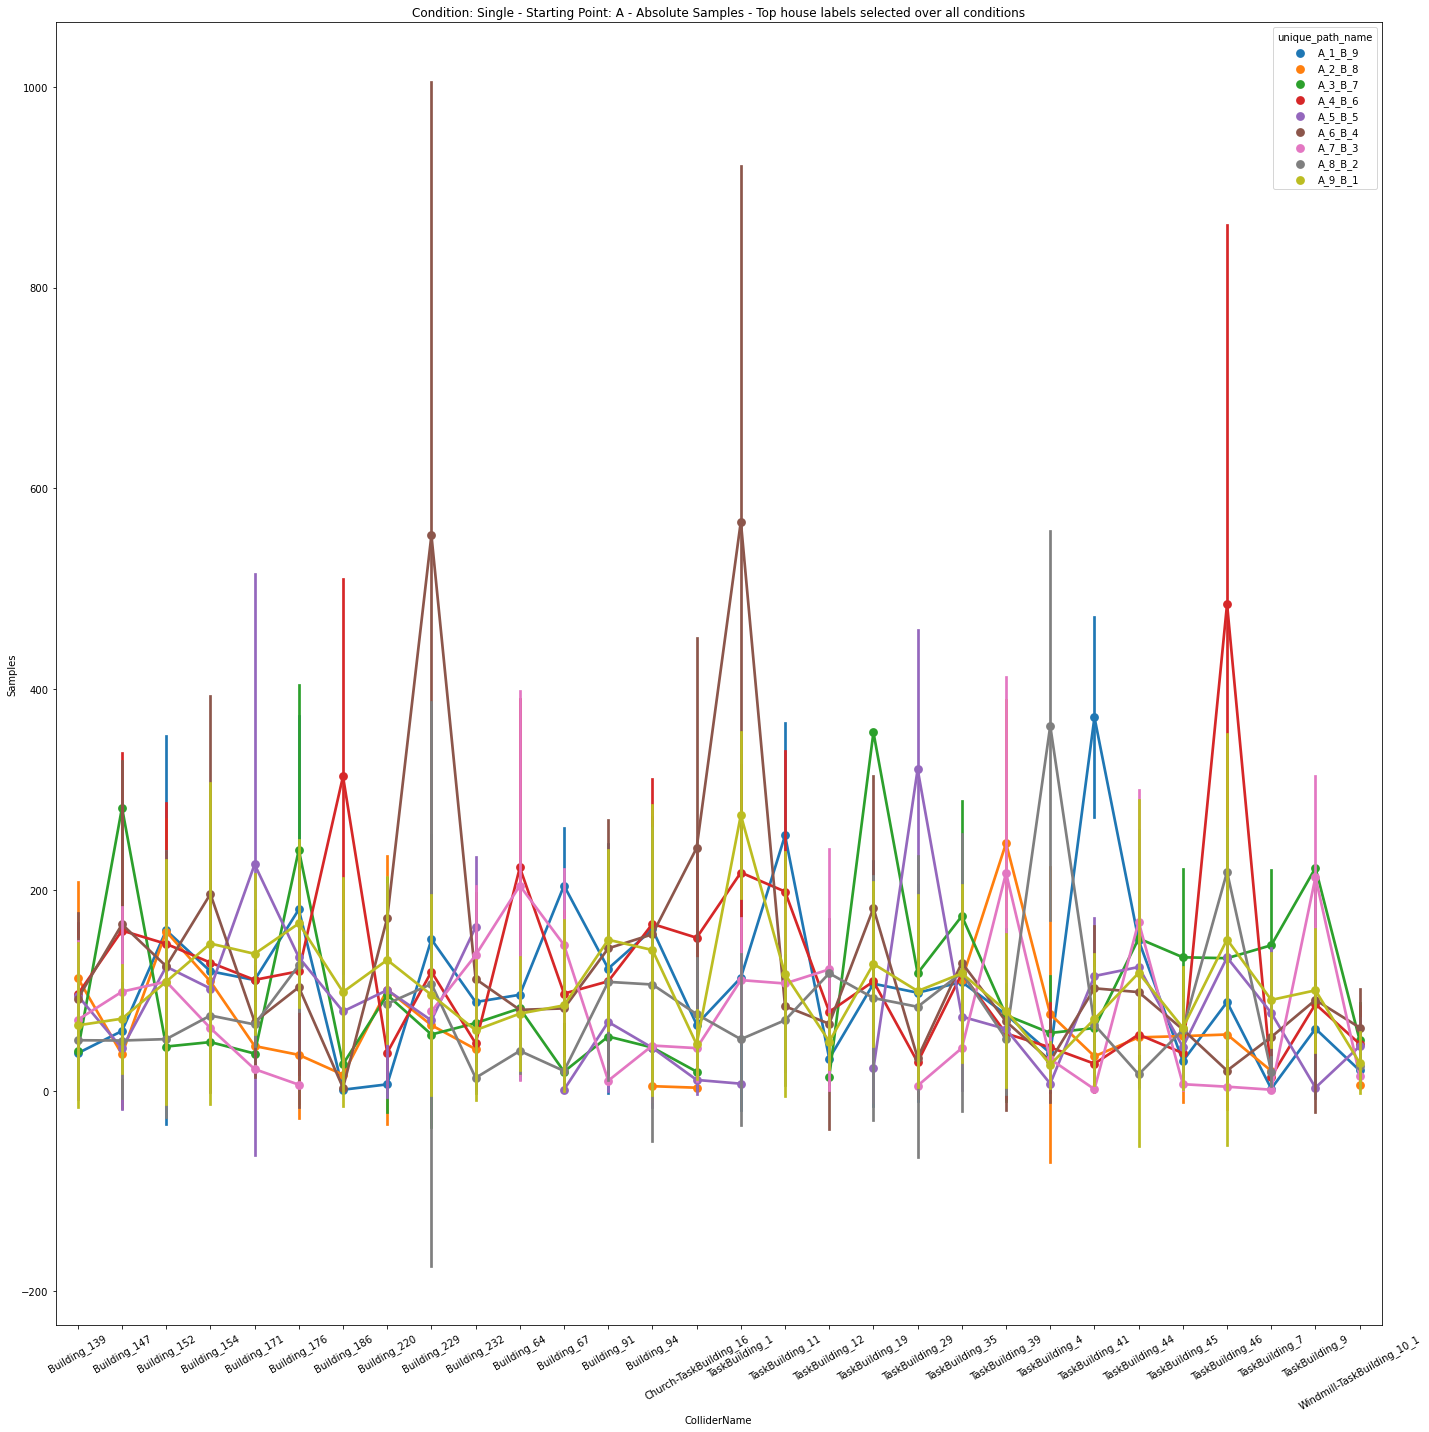

In [29]:
select_condition = "Single"
select_start_point = "A"

data_df = rel_agg_df.copy(deep=True)
data_df = data_df[(data_df["condition"] == select_condition.lower()) & (data_df["start_point"] == select_start_point)]
data_df = data_df[(data_df["ColliderName"].isin(top_house_names))]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# create order
collider_name_list = top_house_names.copy()
collider_name_list.sort()

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False) 
g = sns.pointplot(data=data_df, x="ColliderName", y="Samples", hue="unique_path_name", ci="sd", order=collider_name_list, ax = ax[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0,0].title.set_text("Condition: " + select_condition + " - Starting Point: " + select_start_point + " - Absolute Samples - Top house labels selected over all conditions")


fig.tight_layout()
plt.show()

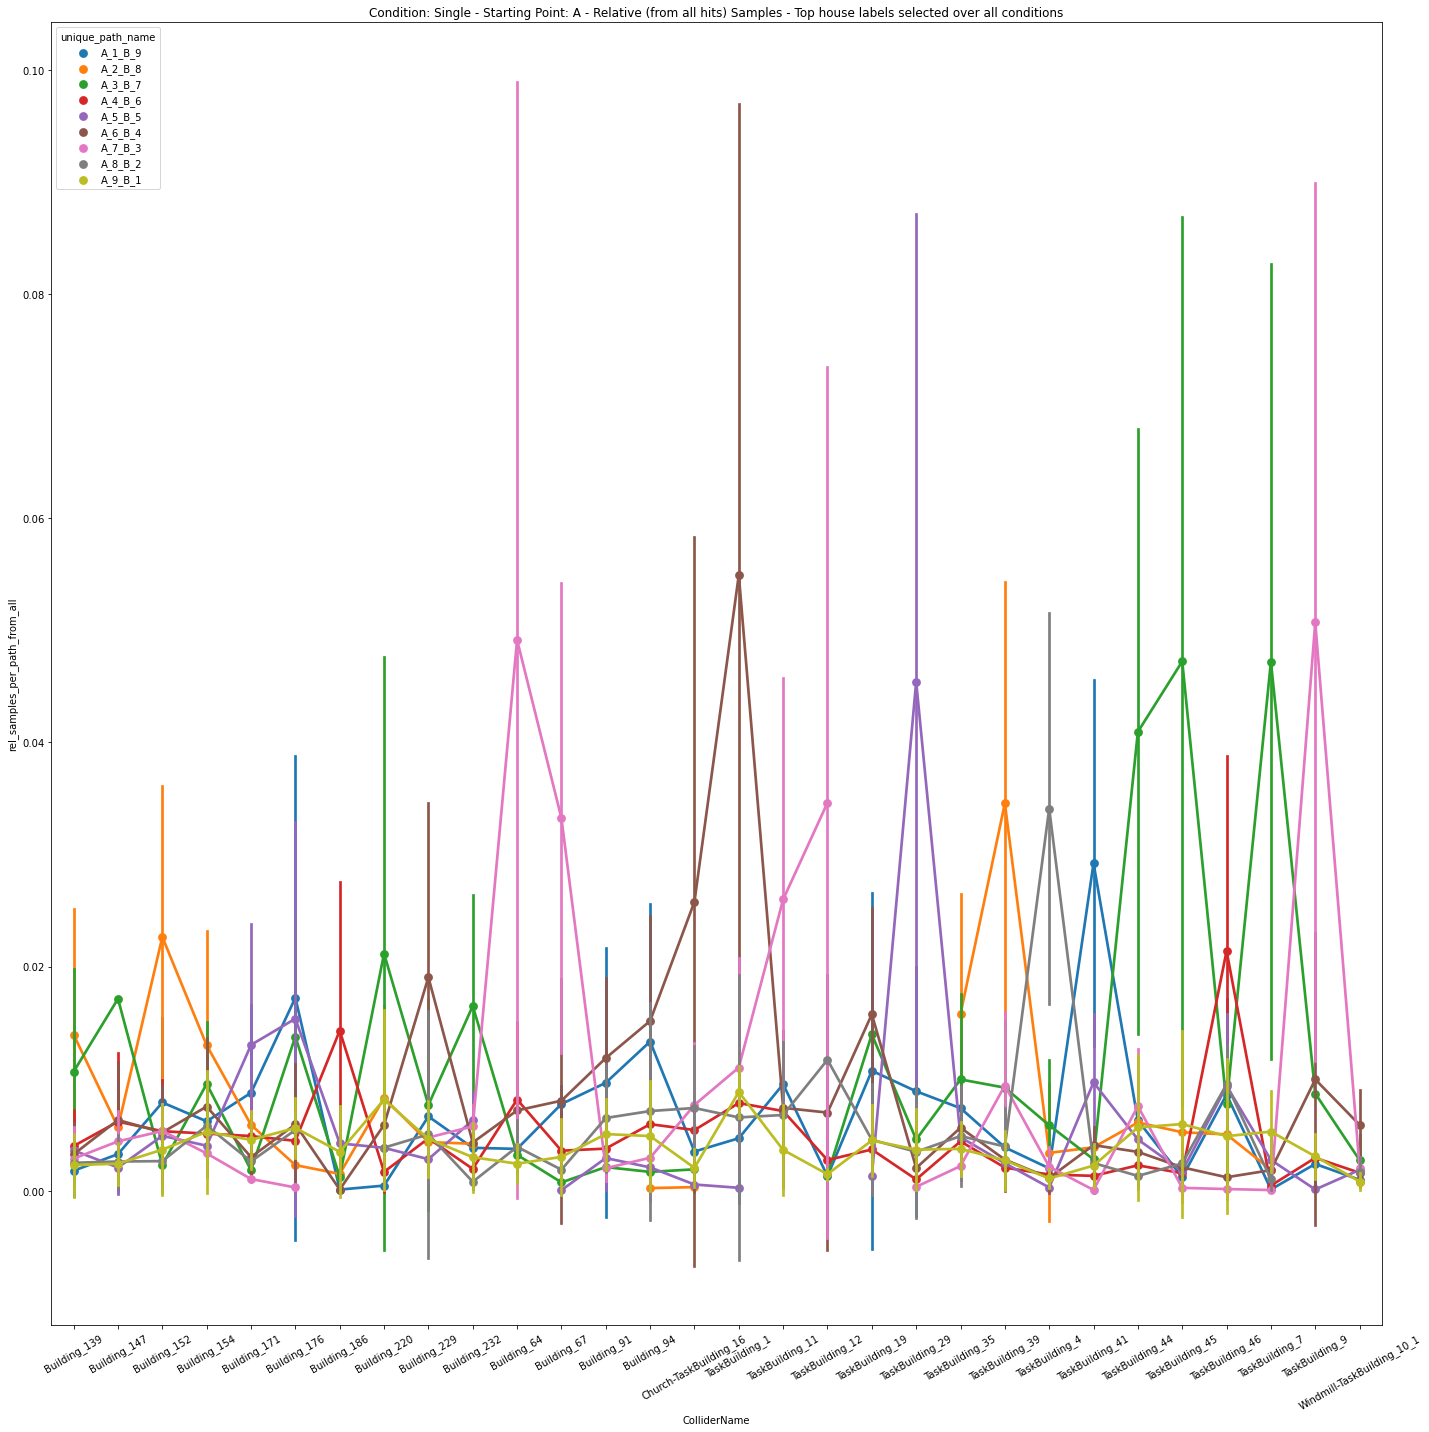

In [30]:
select_condition = "Single"
select_start_point = "A"

data_df = rel_agg_df.copy(deep=True)
data_df = data_df[(data_df["condition"] == select_condition.lower()) & (data_df["start_point"] == select_start_point)]
data_df = data_df[(data_df["ColliderName"].isin(top_house_names))]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# create order
collider_name_list = top_house_names.copy()
collider_name_list.sort()

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)
g = sns.pointplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="unique_path_name", ci="sd", order=collider_name_list, ax = ax[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0,0].title.set_text("Condition: " + select_condition + " - Starting Point: " + select_start_point + " - Relative (from all hits) Samples - Top house labels selected over all conditions")


fig.tight_layout()
plt.show()

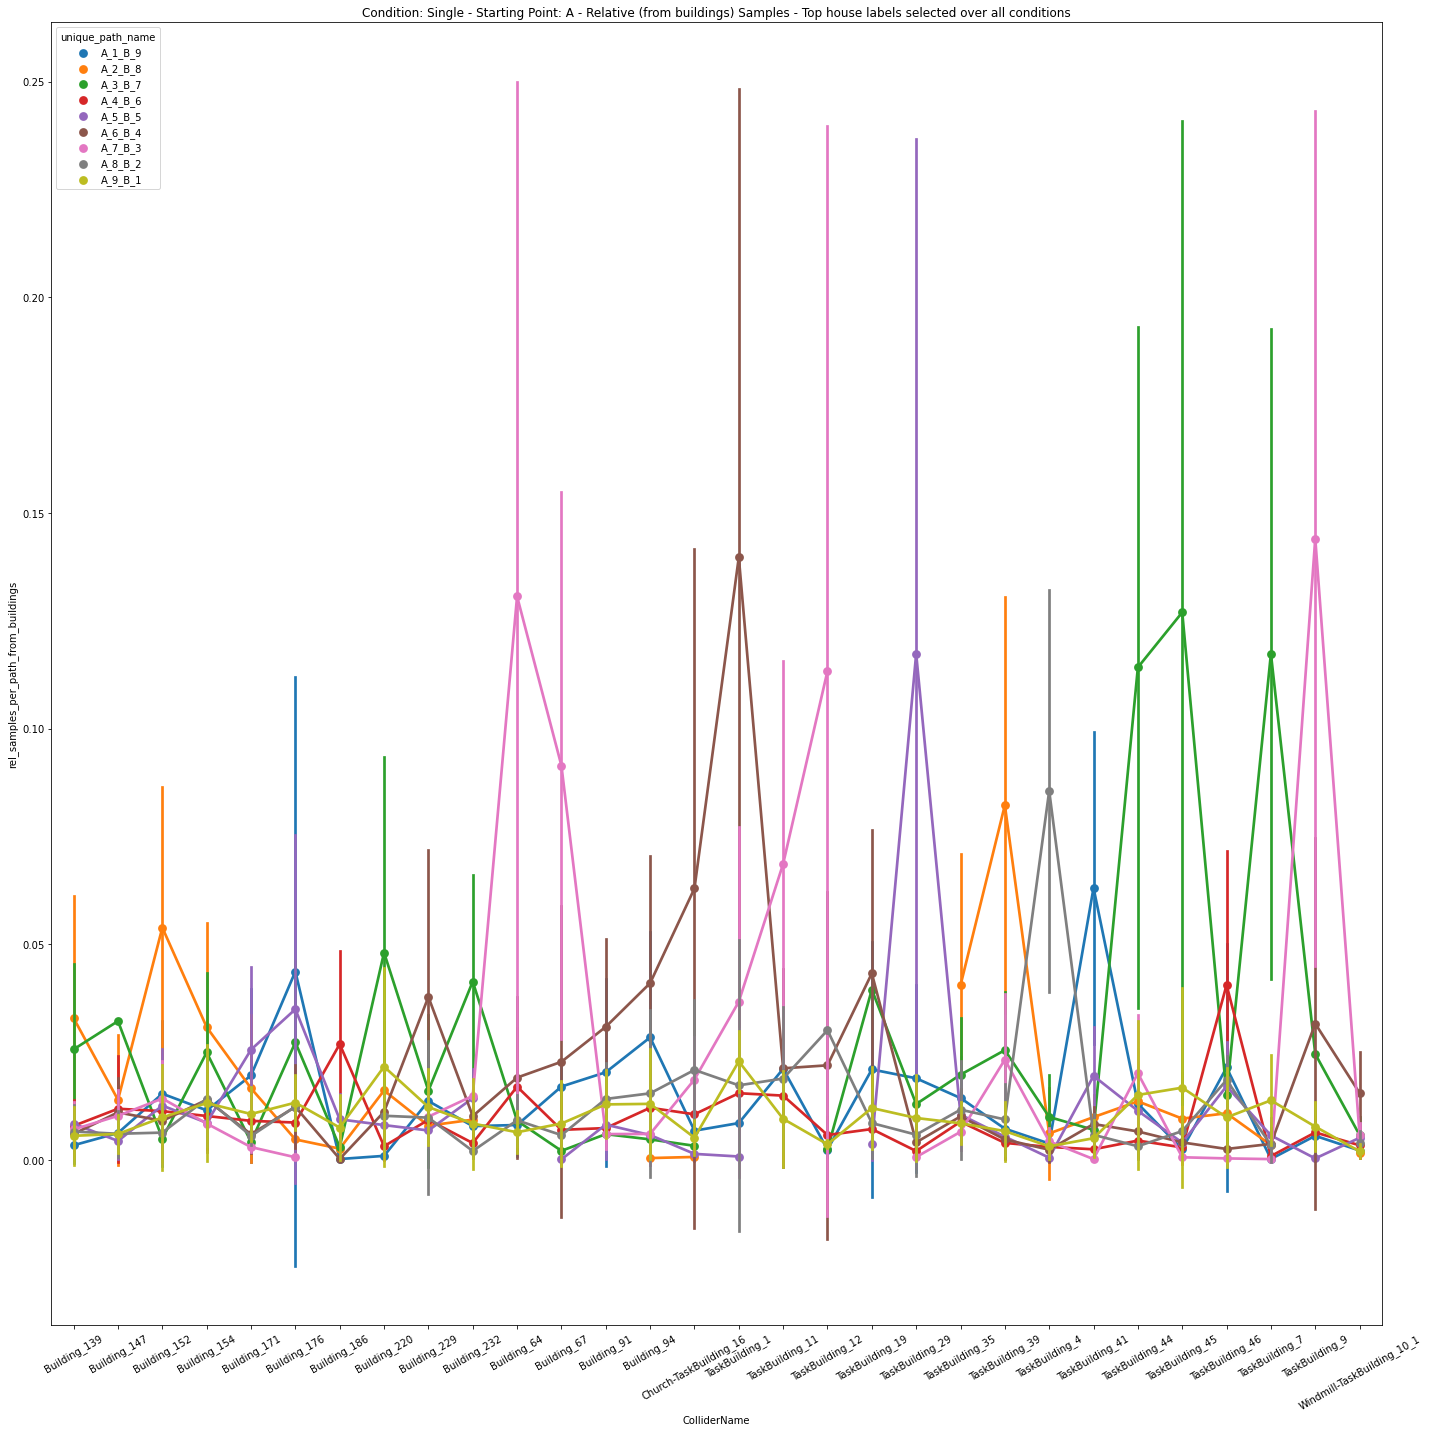

In [31]:
select_condition = "Single"
select_start_point = "A"

data_df = rel_agg_df.copy(deep=True)
data_df = data_df[(data_df["condition"] == select_condition.lower()) & (data_df["start_point"] == select_start_point)]
data_df = data_df[(data_df["ColliderName"].isin(top_house_names))]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# create order
collider_name_list = top_house_names.copy()
collider_name_list.sort()

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)
g = sns.pointplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_buildings", hue="unique_path_name", ci="sd", order=collider_name_list, ax = ax[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0,0].title.set_text("Condition: " + select_condition + " - Starting Point: " + select_start_point + " - Relative (from buildings) Samples - Top house labels selected over all conditions")


fig.tight_layout()
plt.show()

### Single condition, single startpoint, multiple paths, multiple subjects

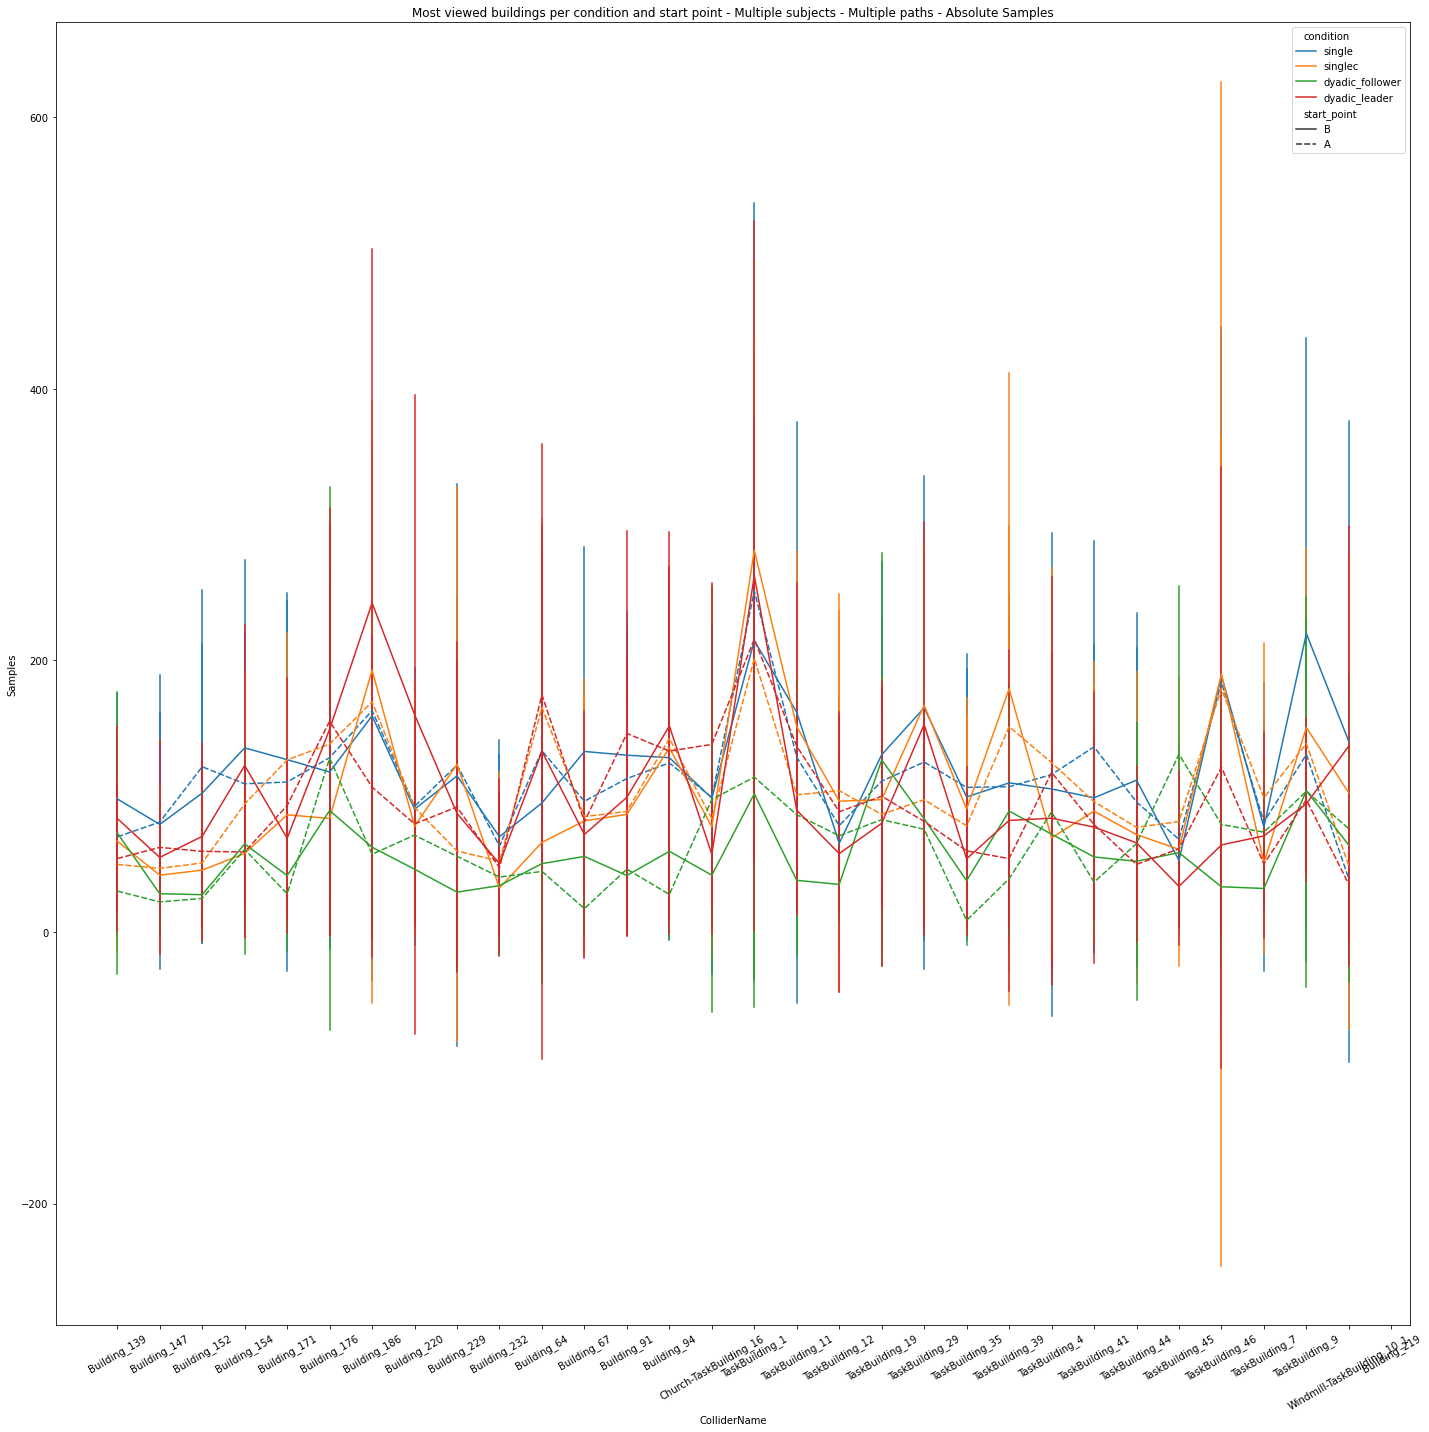

In [13]:
include_exploration = False

data_df = rel_agg_df.copy(deep=True)

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = top_house_names.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# filter 
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[(data_df["ColliderName"].isin(top_house_names))]
if not include_exploration:
    data_df = data_df[data_df["condition"] != "exploration"]
    

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="Samples", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings per condition and start point - Multiple subjects - Multiple paths - Absolute Samples")


fig.tight_layout()
plt.show()



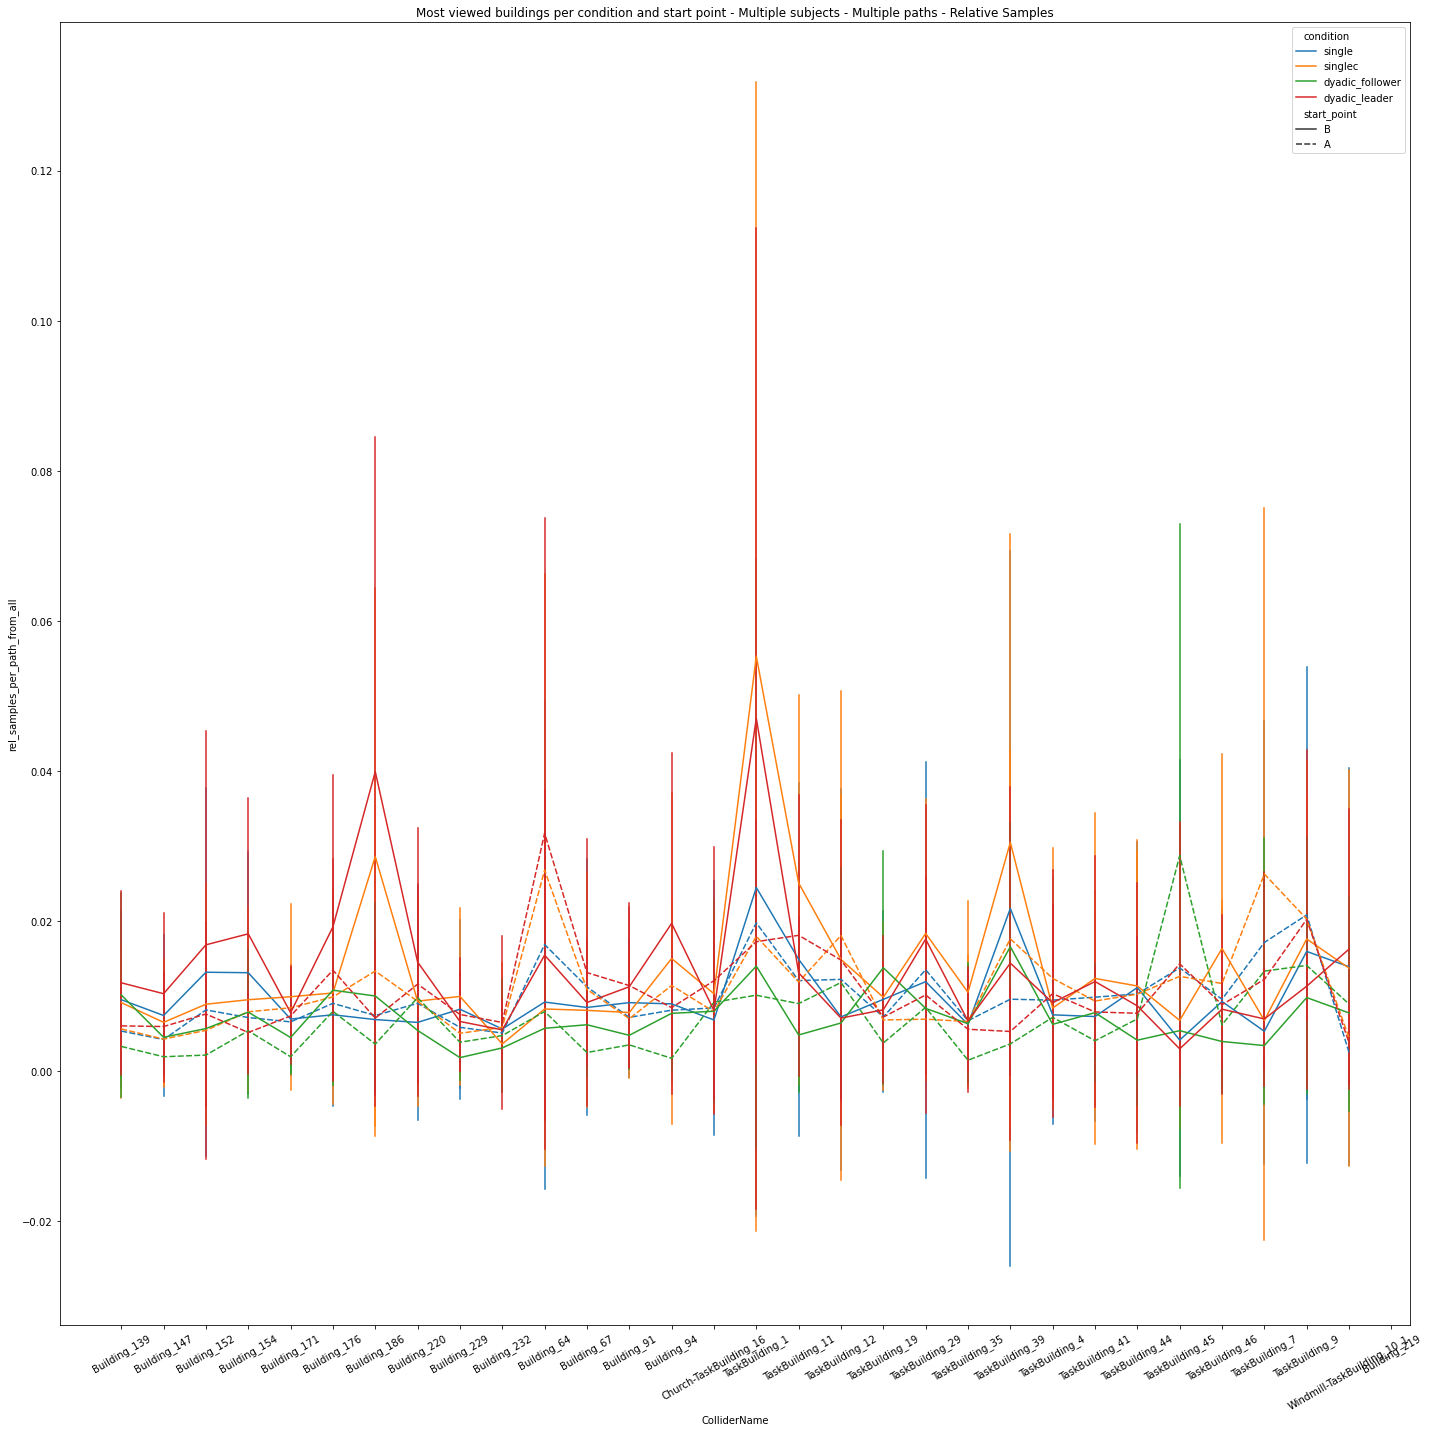

In [14]:
include_exploration = False

data_df = rel_agg_df.copy(deep=True)

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = top_house_names.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# filter 
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[(data_df["ColliderName"].isin(top_house_names))]
if not include_exploration:
    data_df = data_df[data_df["condition"] != "exploration"]
    

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings per condition and start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()



## Using Custom House Lists

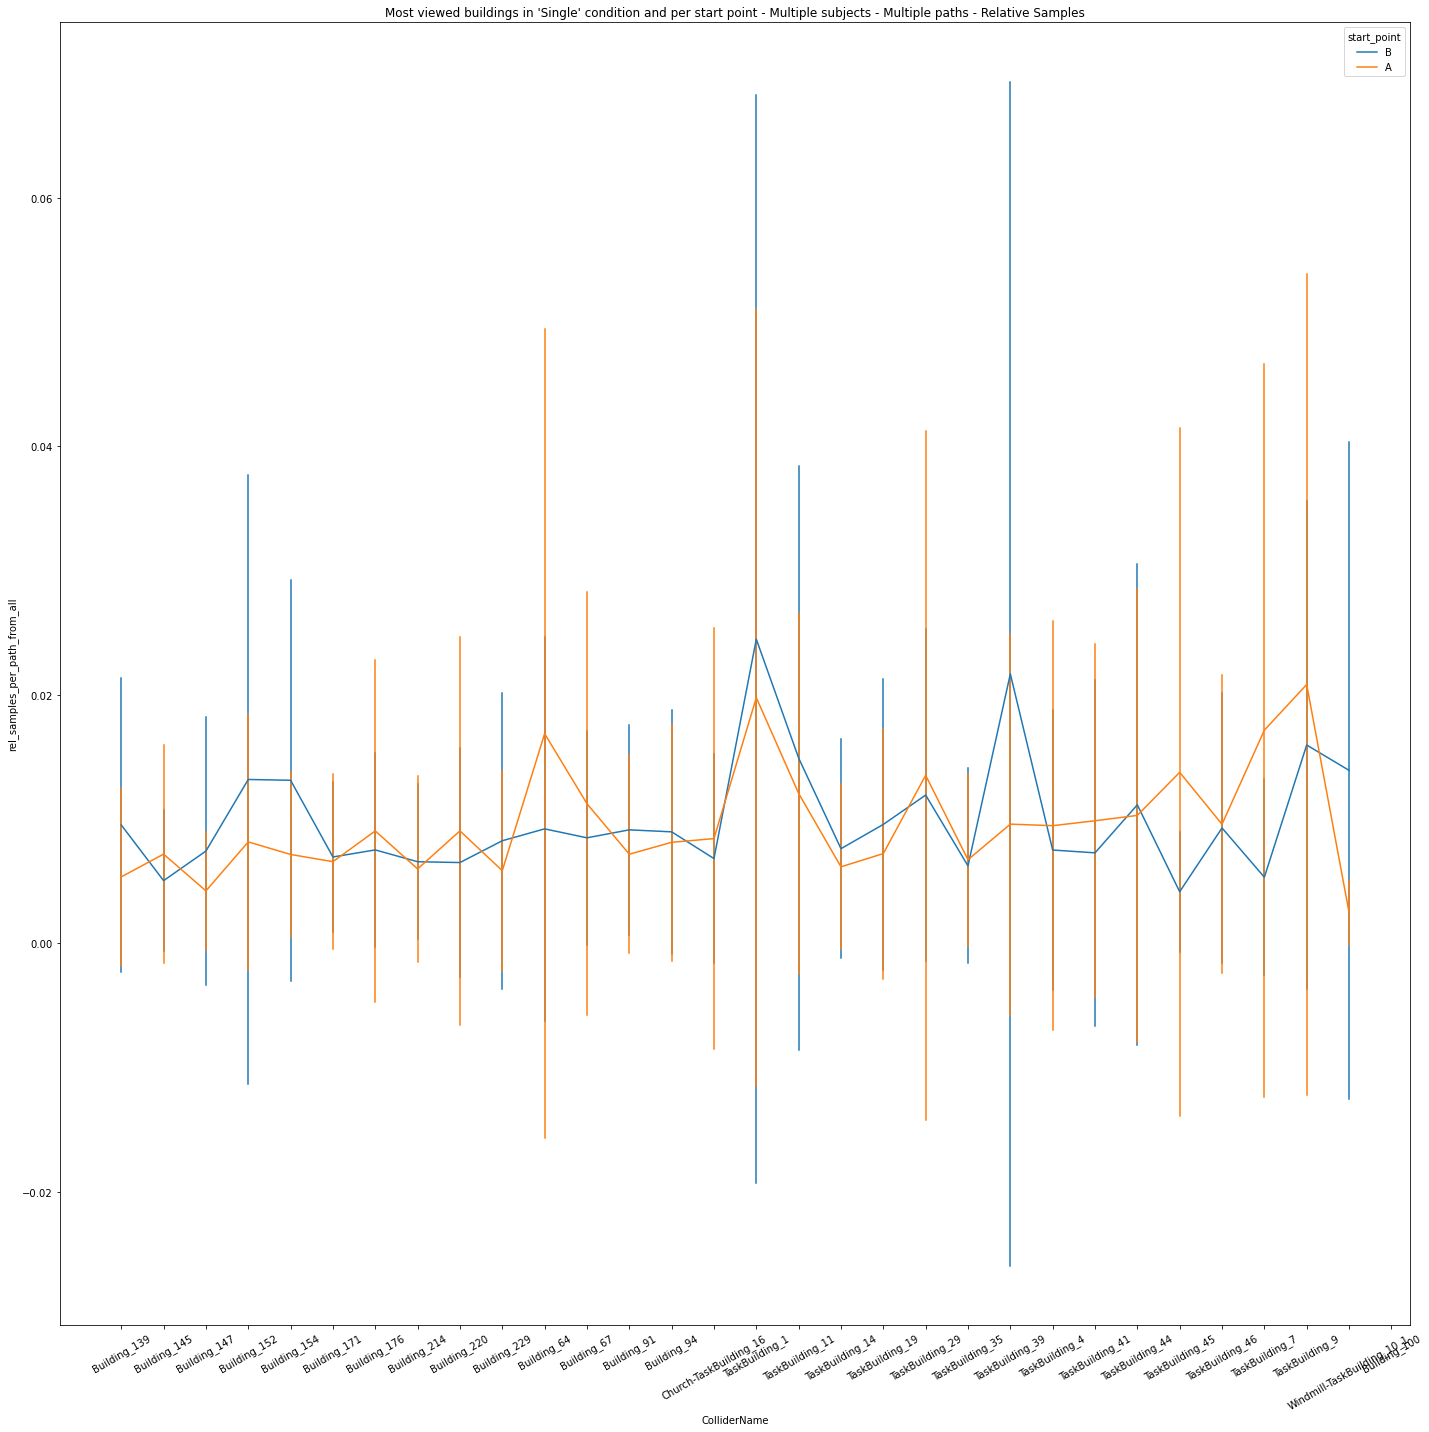

In [15]:
# Only Single

data_df = rel_agg_df.copy(deep=True)

# Initial filter 
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[data_df["condition"] == "single"]

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")


# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# Later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]
    

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Single' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

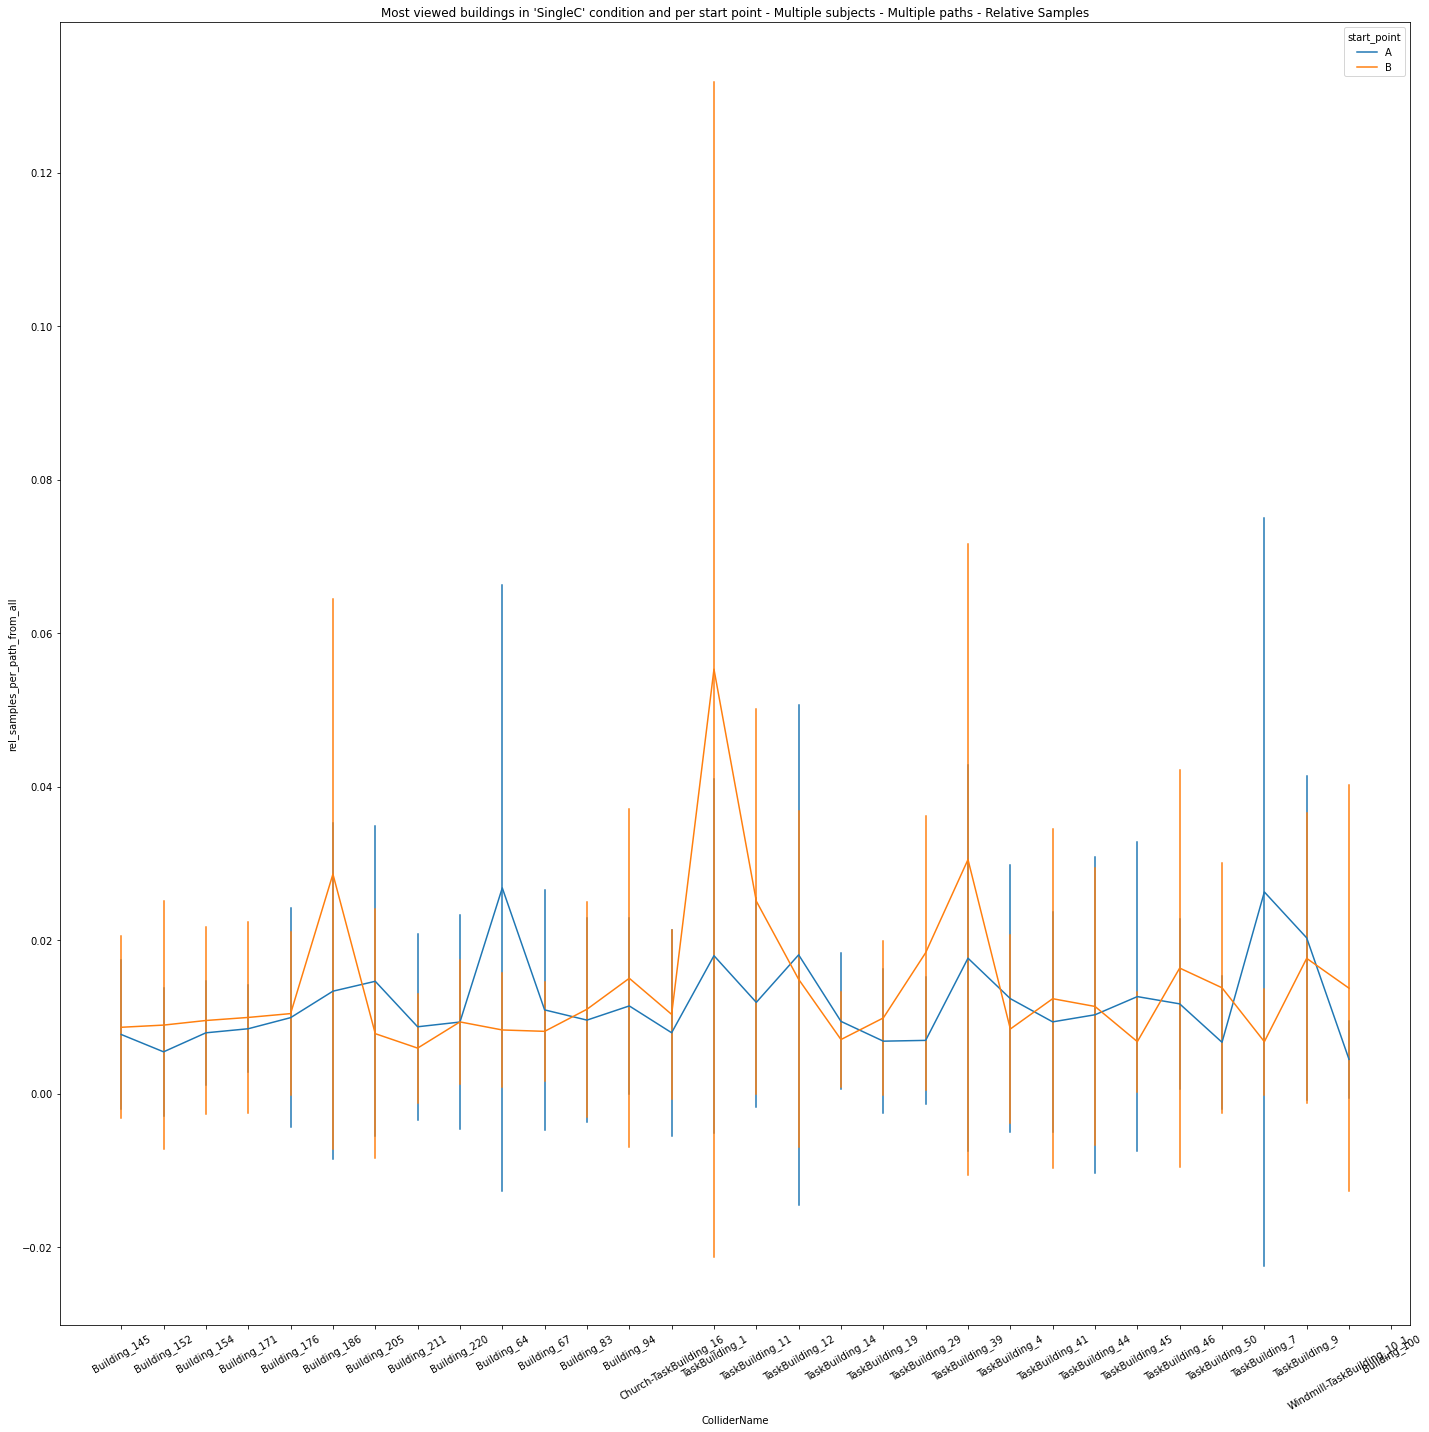

In [33]:
# Only SingleC

data_df = rel_agg_df.copy(deep=True)

# initial filter
data_df = data_df[data_df["condition"] == "singlec"]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# later filter 
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'SingleC' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

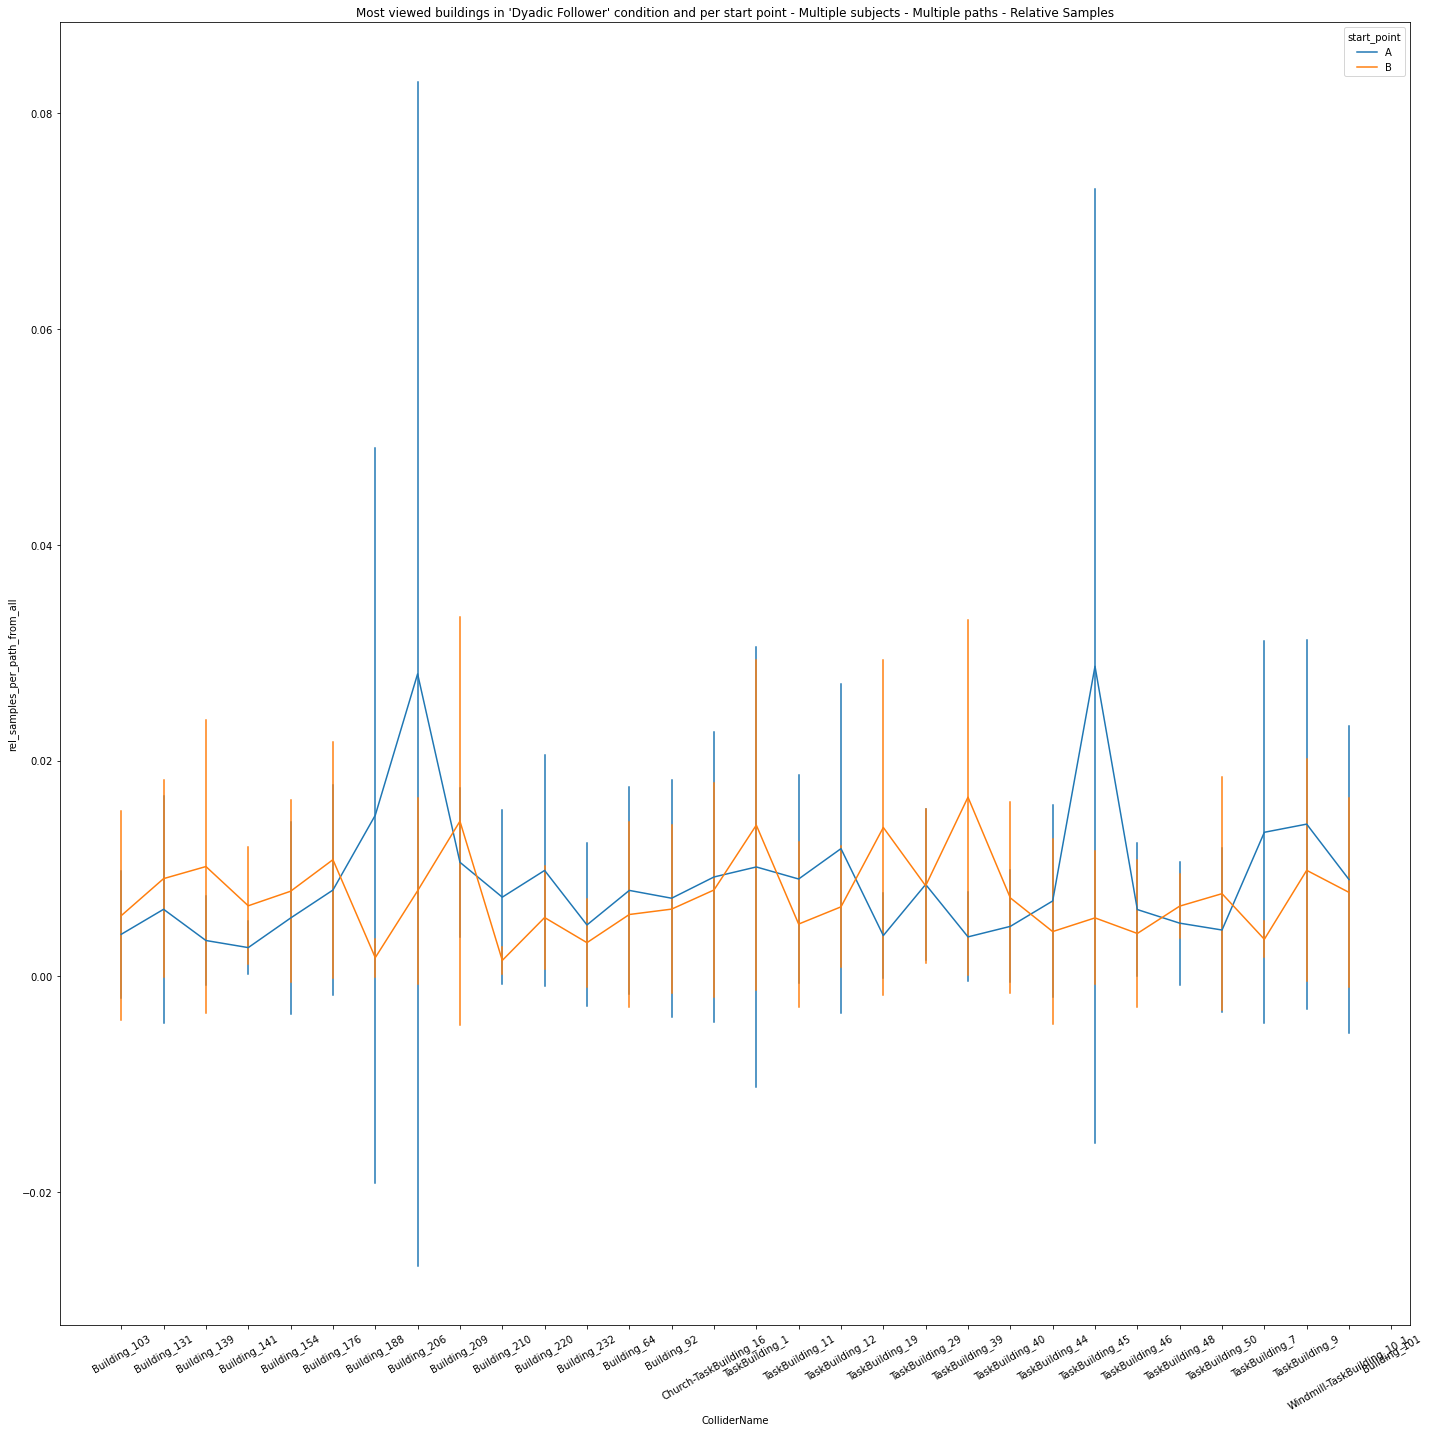

In [17]:
# Only Dyadic Follower 

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[data_df["condition"] == "dyadic_follower"]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                    ordered=True)

data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Dyadic Follower' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

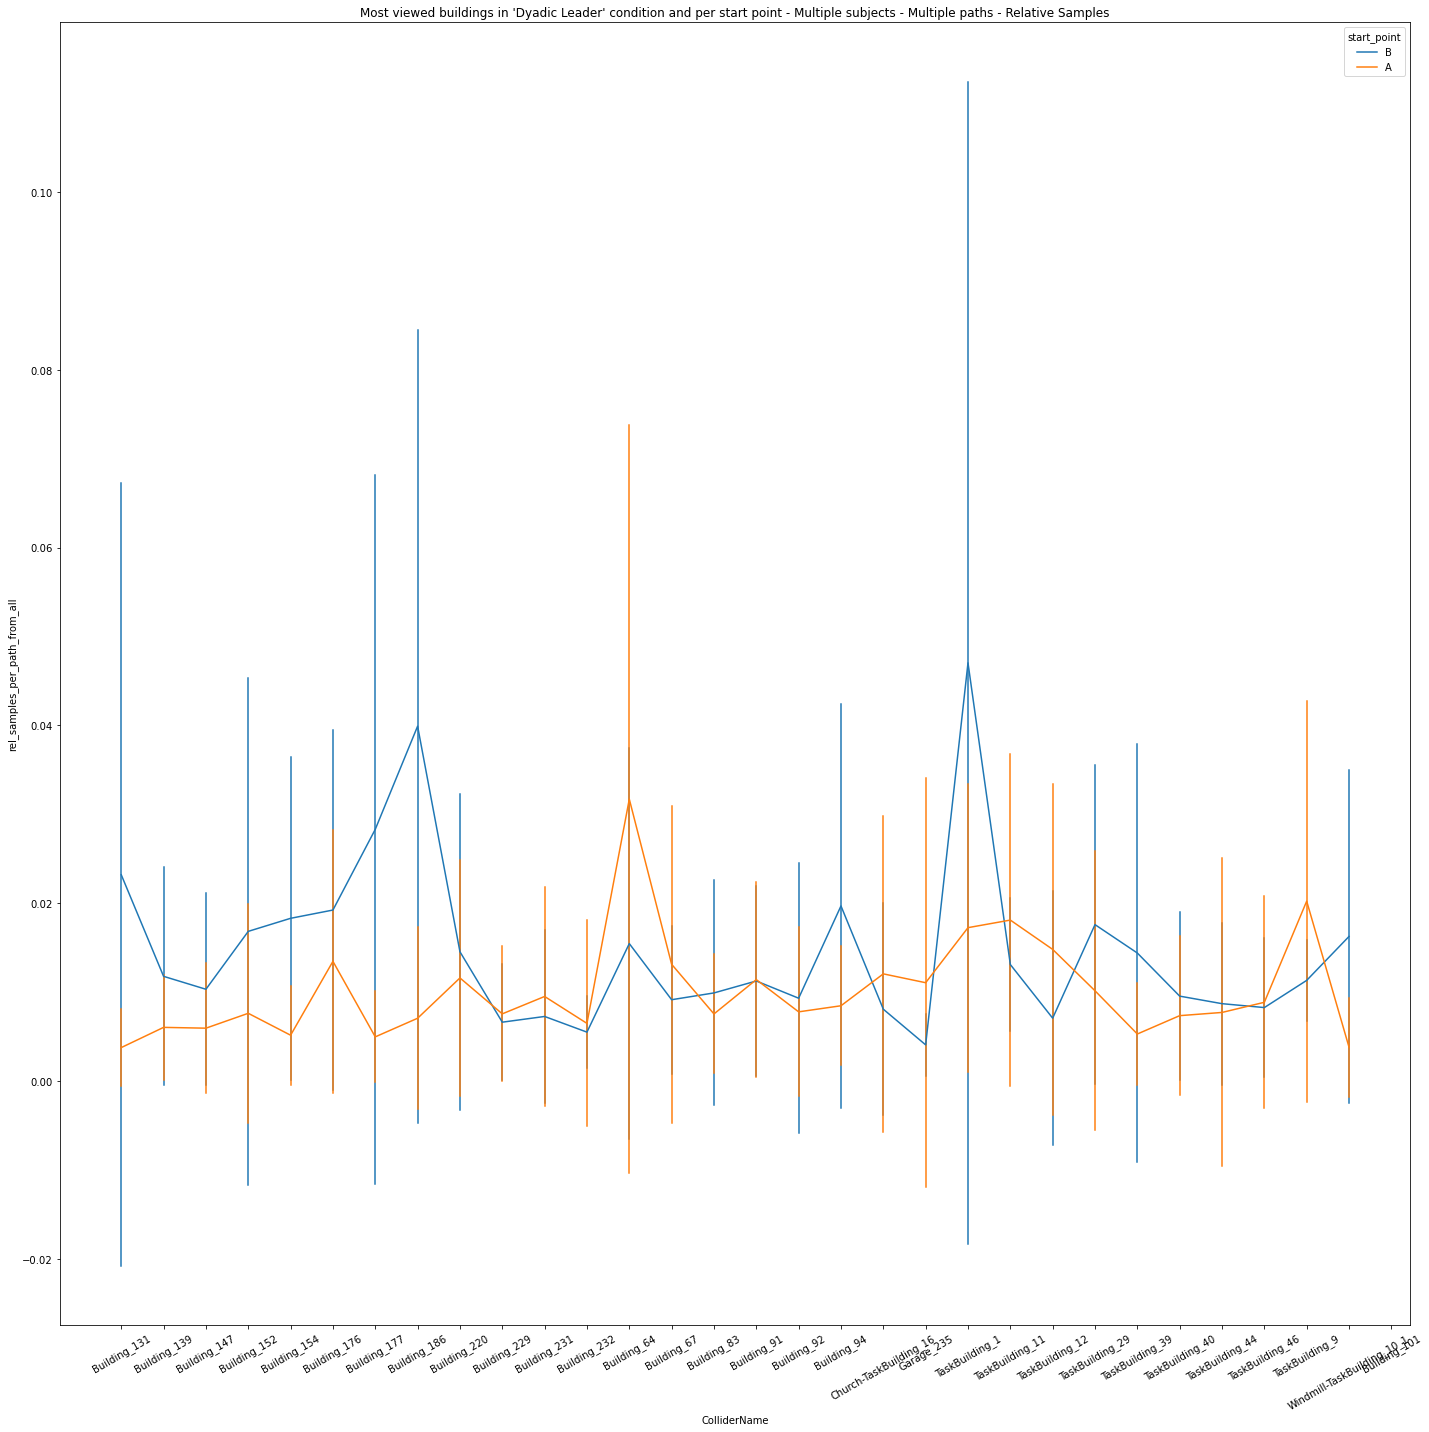

In [18]:
# Only Dyadic Leader 

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[data_df["condition"] == "dyadic_leader"]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Dyadic Leader' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

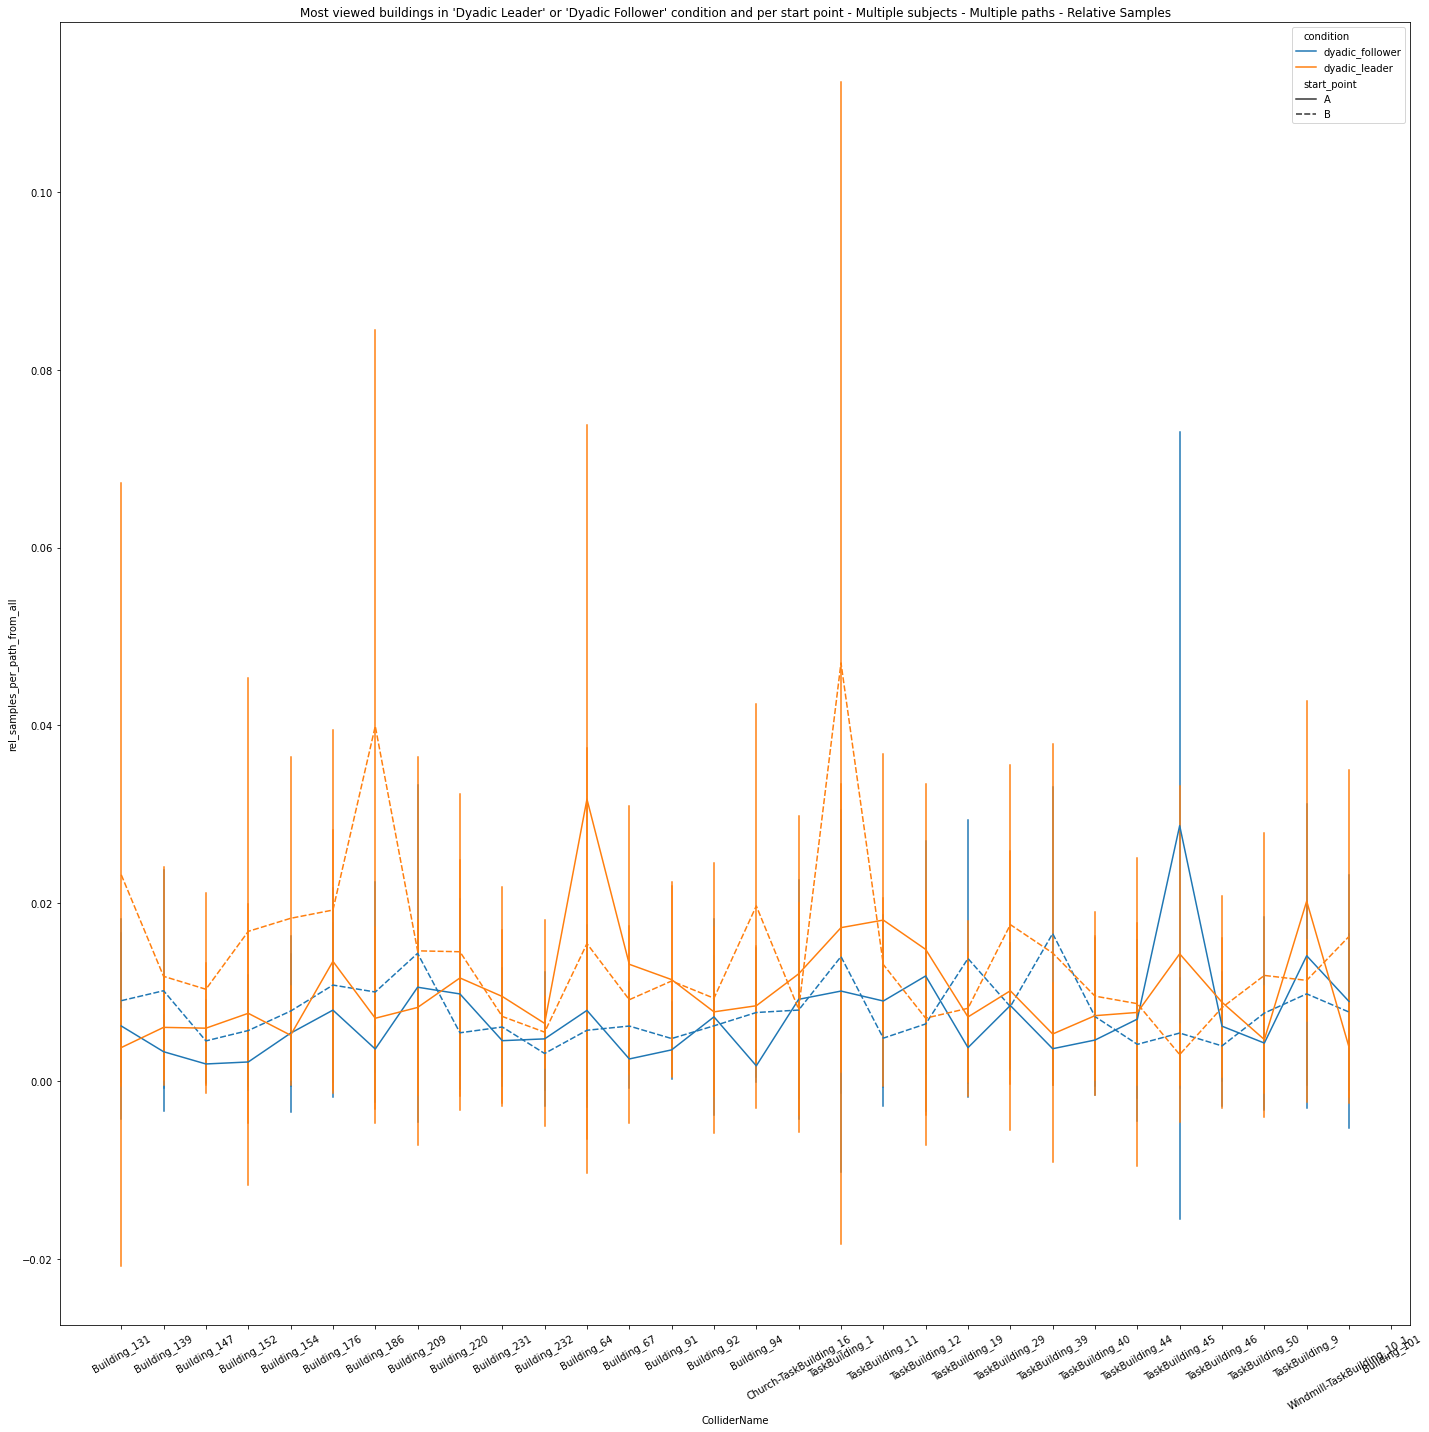

In [19]:
# Only Dyadic Leader and Dyadic Follower

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[(data_df["condition"] == "dyadic_leader") | (data_df["condition"] == "dyadic_follower")]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
    
# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Dyadic Leader' or 'Dyadic Follower' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

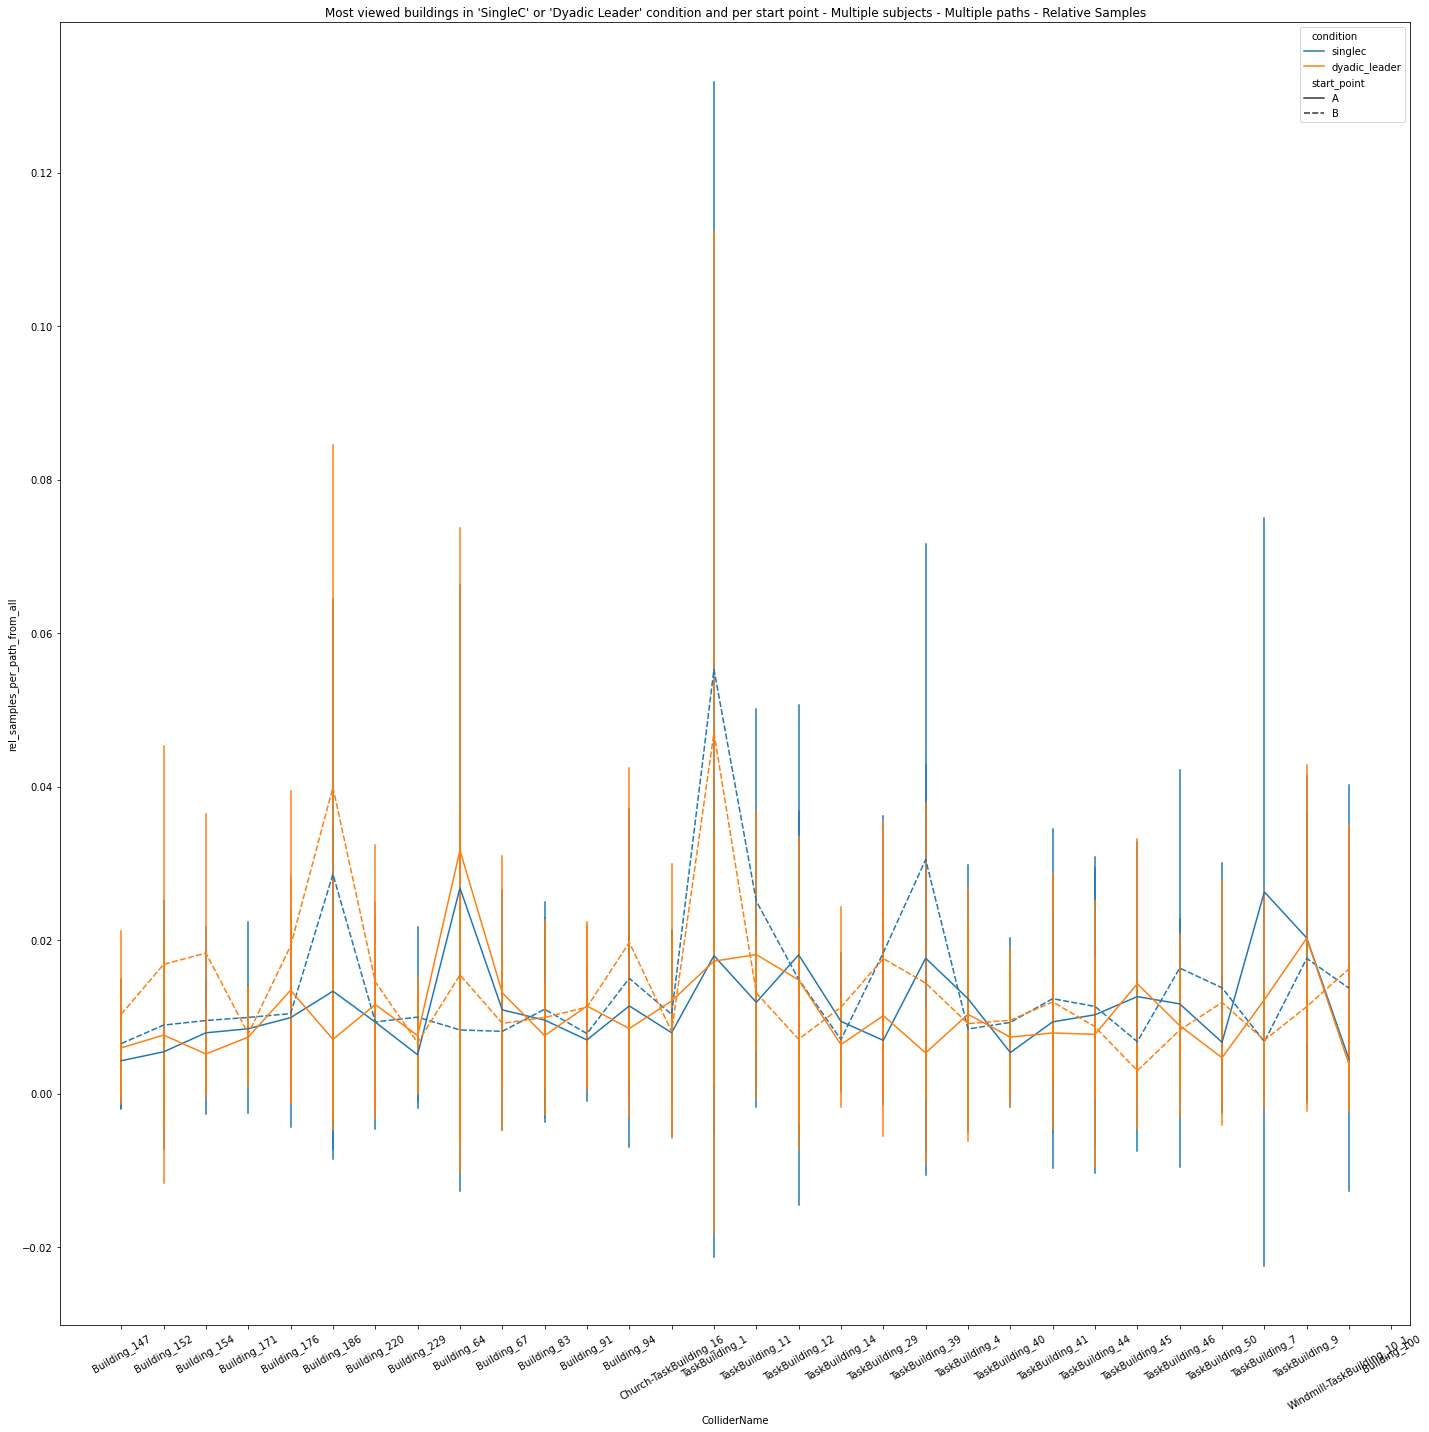

In [20]:
# Only SingleC and Dyadic Leader

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[(data_df["condition"] == "singlec") | (data_df["condition"] == "dyadic_leader")]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
    
# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)
 
# later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'SingleC' or 'Dyadic Leader' condition and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

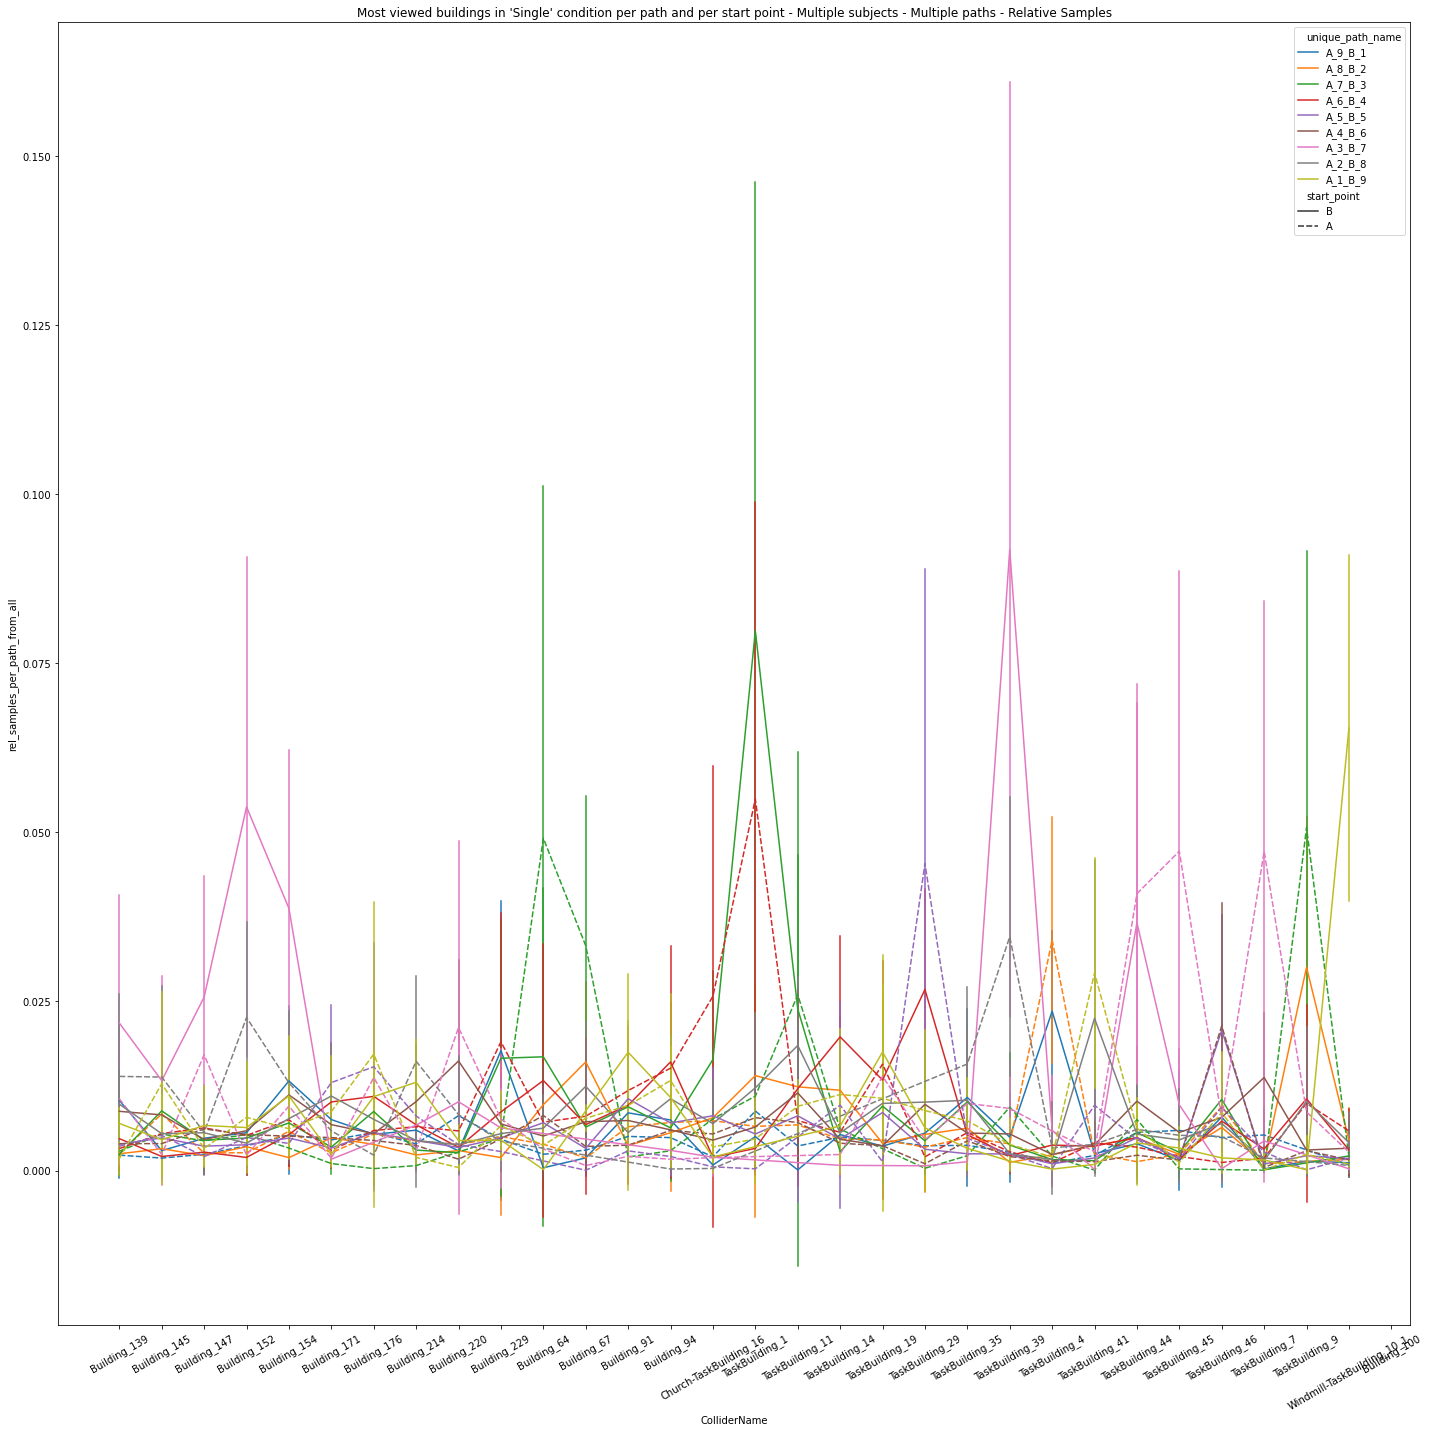

In [35]:
# Only Single

data_df = rel_agg_df.copy(deep=True)

# Initial filter 
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[data_df["condition"] == "single"]

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")


# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# Later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]
    

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="unique_path_name", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Single' condition per path and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

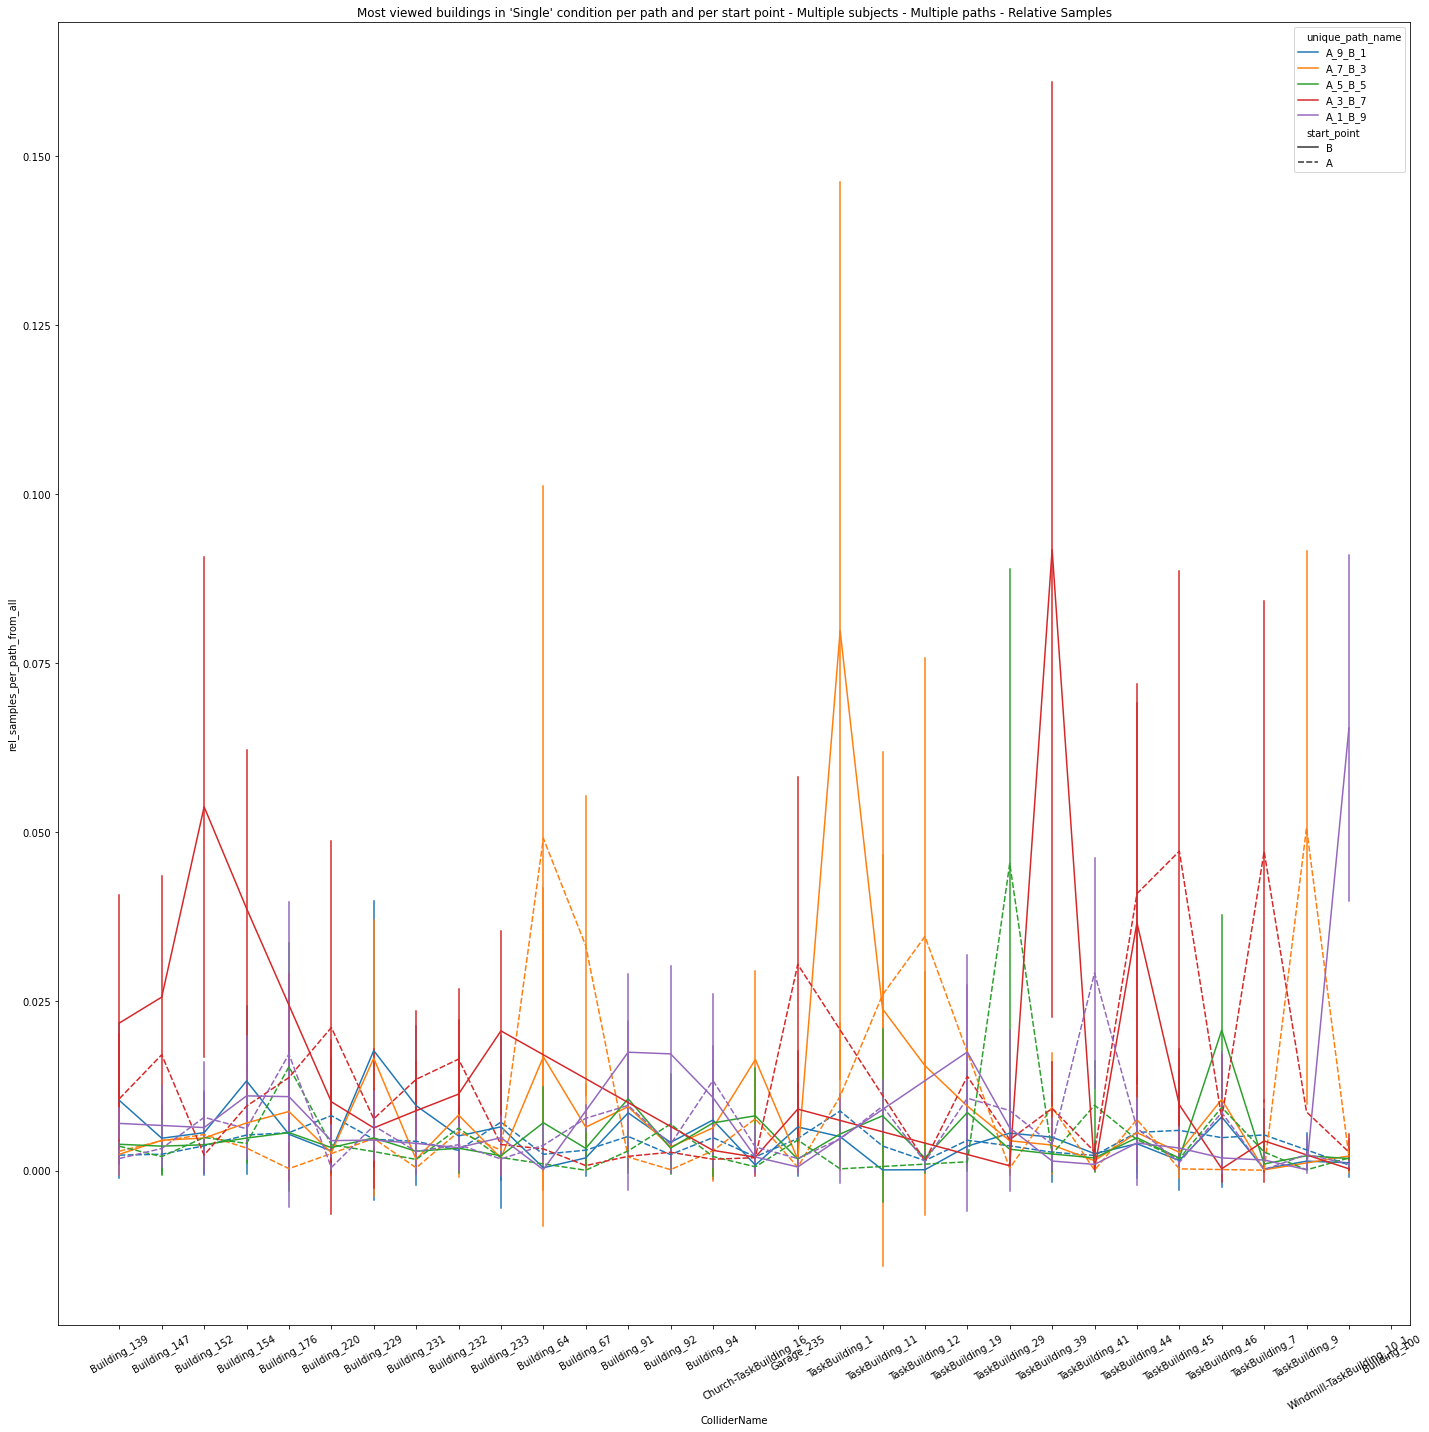

In [22]:
# Only Single, only some paths 

data_df = rel_agg_df.copy(deep=True)

# Initial filter 
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[data_df["condition"] == "single"]
data_df = data_df[data_df["unique_path_name"].isin(["A_1_B_9","A_3_B_7","A_5_B_5","A_7_B_3","A_9_B_1"])]

# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")


# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)

# Later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]
    

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_all", hue="unique_path_name", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'Single' condition per path and per start point - Multiple subjects - Multiple paths - Relative Samples")


fig.tight_layout()
plt.show()

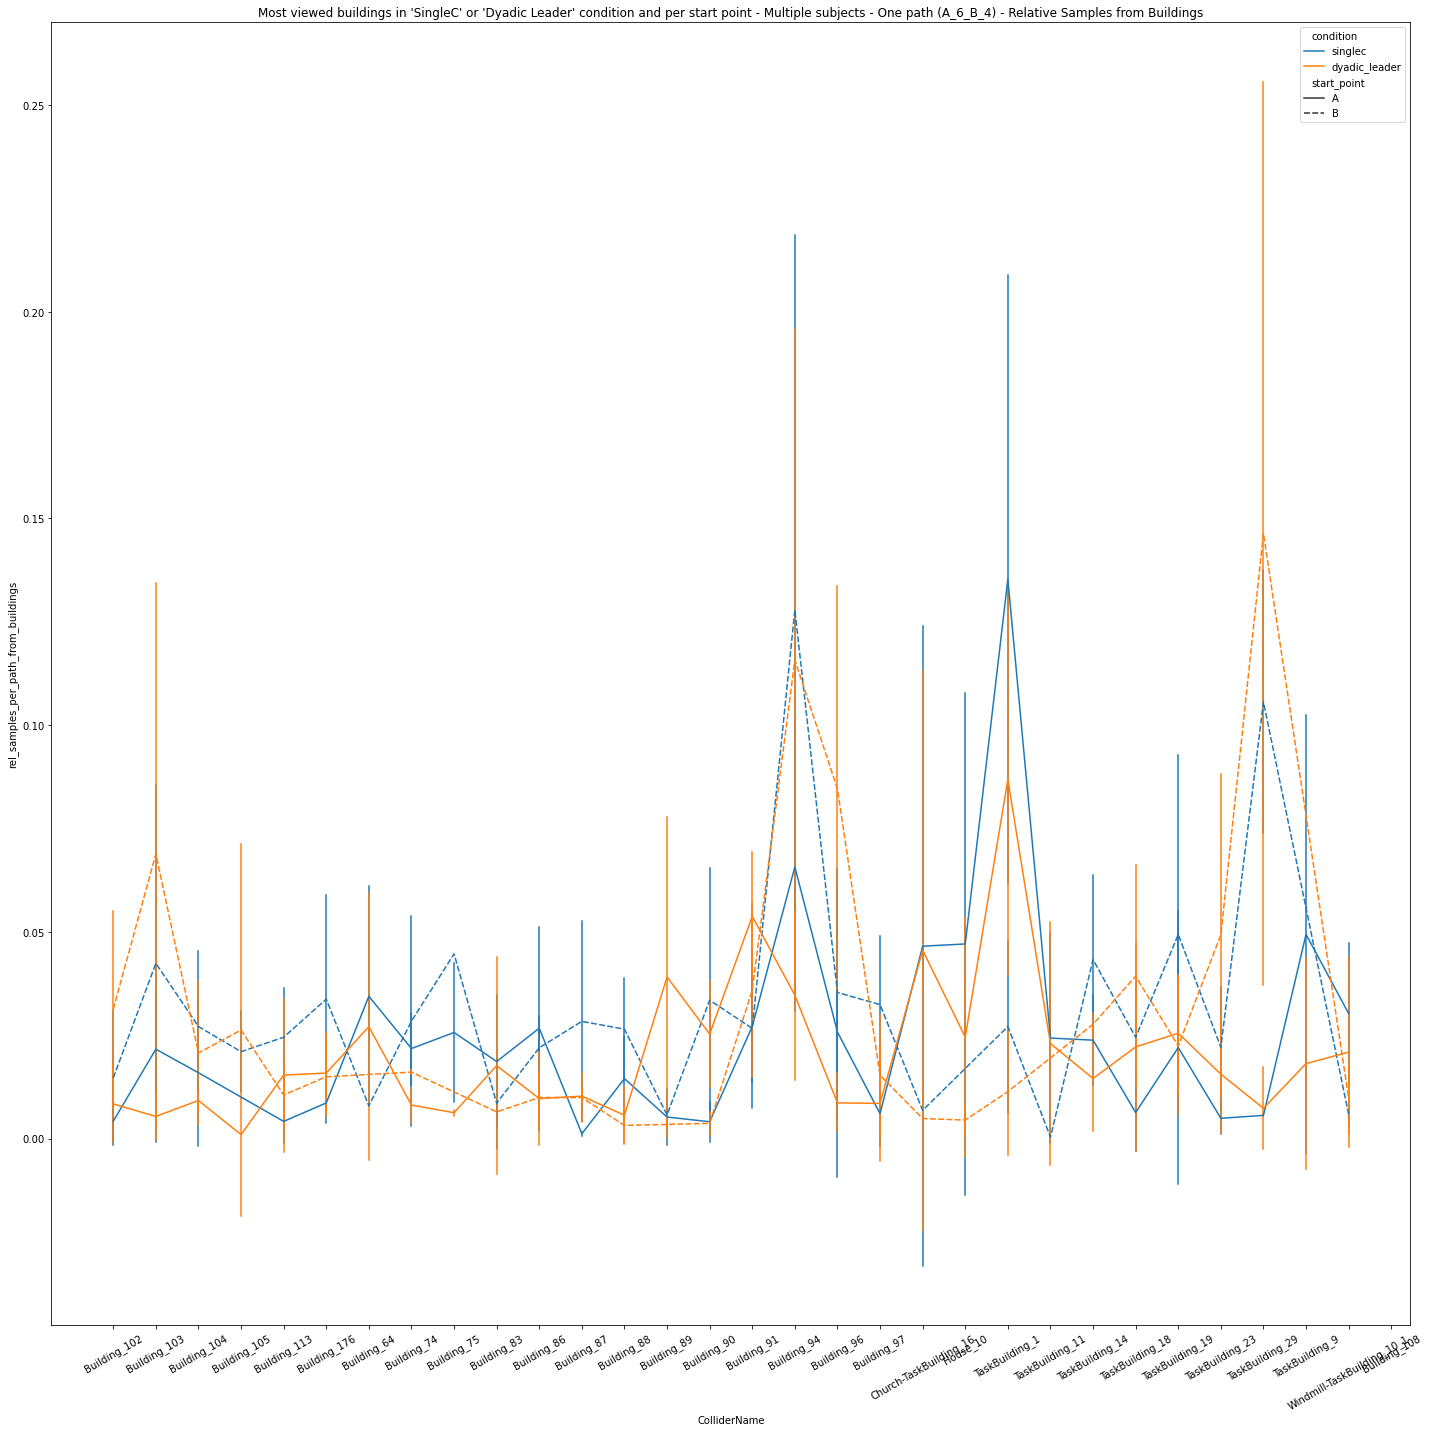

In [81]:
# Only SingleC and Dyadic Leader, only one path (A_6_B_4)

# use rel from buildings here

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[(data_df["condition"] == "singlec") | (data_df["condition"] == "dyadic_leader")]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[data_df["unique_path_name"].isin(["A_6_B_4"])]

    
# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_buildings_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)
 
# later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_buildings", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'SingleC' or 'Dyadic Leader' condition and per start point - Multiple subjects - One path (A_6_B_4) - Relative Samples from Buildings")


fig.tight_layout()
plt.show()

## Investigating Follower vs Leader

In [71]:
# Relative samples verification
# Two paths, 8 leaders, 8 followers -> 2*(8+8) = 32 relative sample sum 

desired_path_test = ["A_6_B_4","A_7_B_3"]
data_df_test = rel_agg_df.copy(deep=True)
data_df_test = data_df_test[(data_df_test["condition"] == "dyadic_leader") | (data_df_test["condition"] == "dyadic_follower")]
data_df_test = data_df_test[data_df_test["unique_path_name"].isin(desired_path_test)]
data_df_test["rel_samples_per_path_from_buildings"].sum()


31.999999999999996

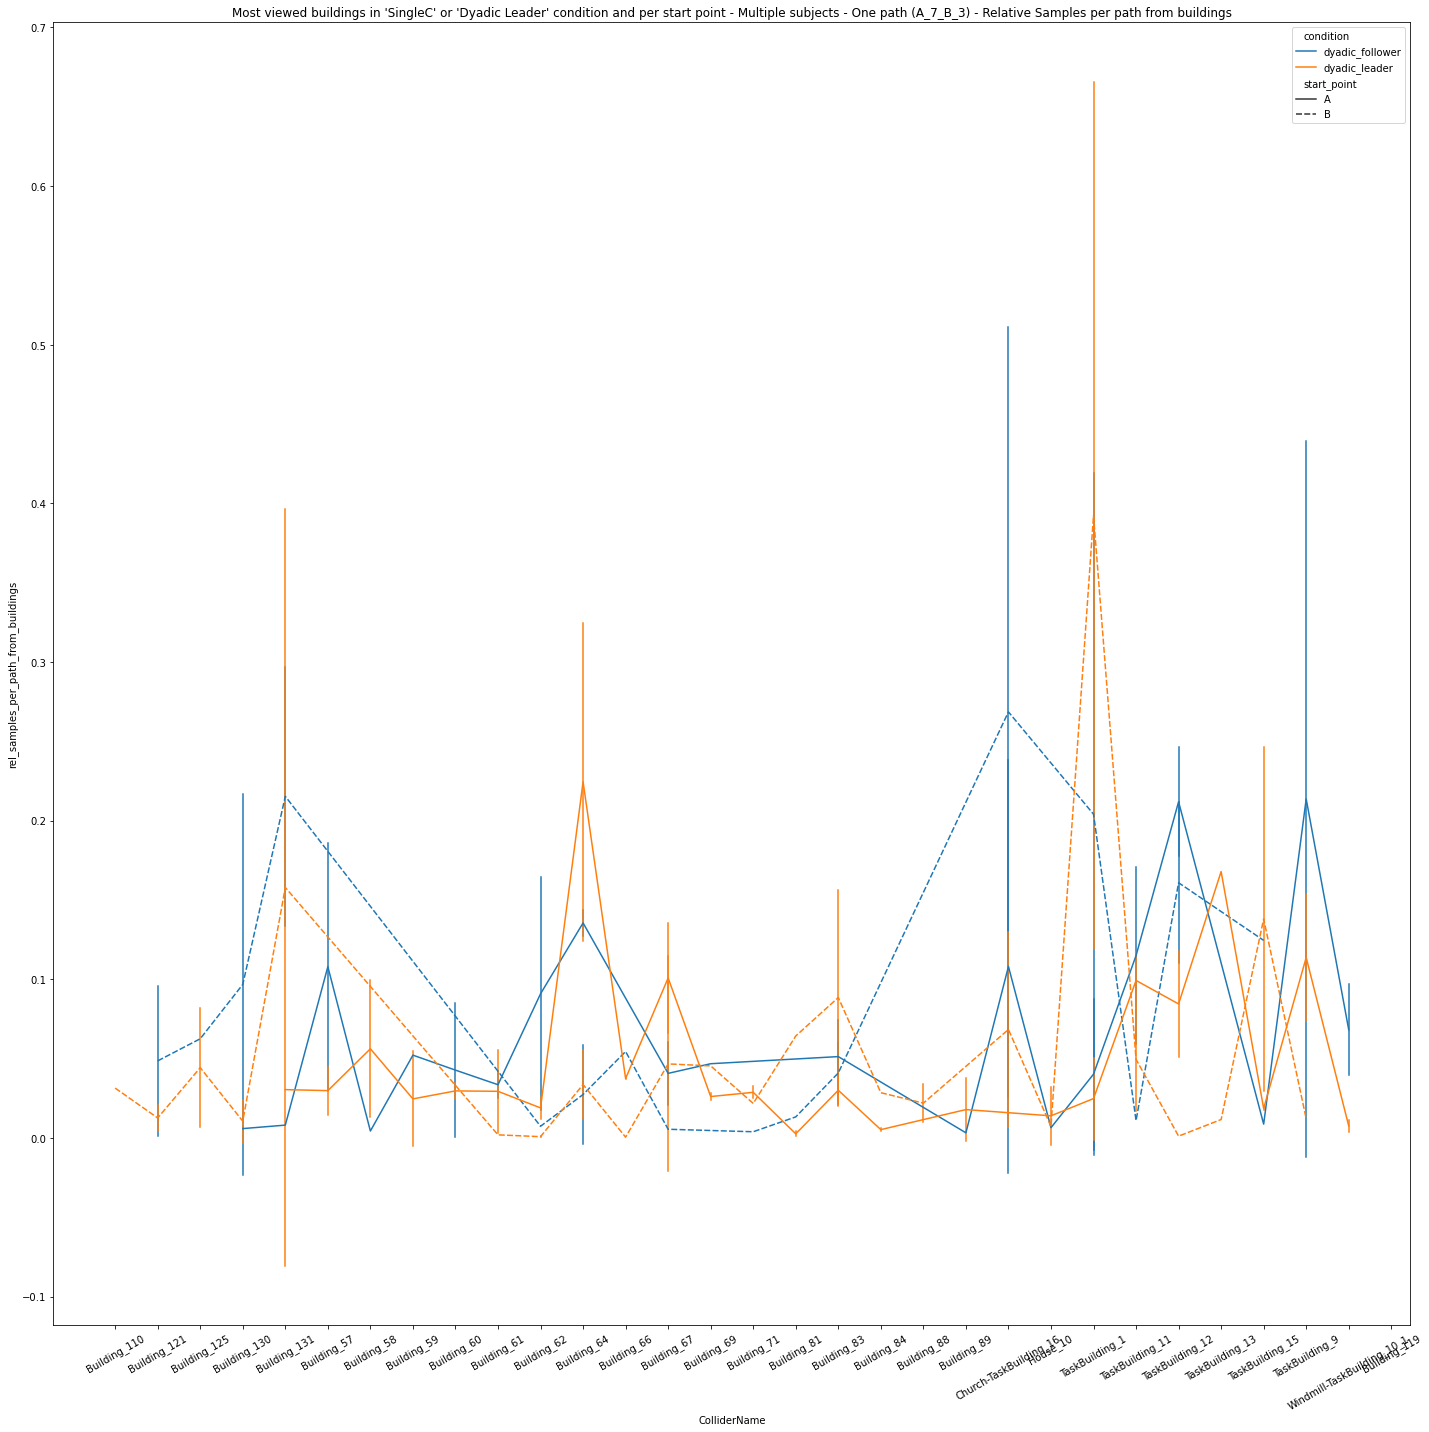

In [79]:
# Only Dyadic Leader and Dyadic Follower, only one path

# Using only leader and follower data
# Using only single path 
# Using for plotting relative samples generated per path from only non-house fixations 
# Thus, follower having less fixations on actual buildings is accounted for 

# Per path, rel. samples sum to 1
# So as we are looking at one path here, 
# we get the average total fraction of fixations on the respective building.

desired_path = "A_7_B_3"

data_df = rel_agg_df.copy(deep=True)

# initial filter 
data_df = data_df[(data_df["condition"] == "dyadic_leader") | (data_df["condition"] == "dyadic_follower")]
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 
data_df = data_df[data_df["unique_path_name"].isin([desired_path])]

    
# Find top houses
special_top_houses = find_top_houses(data_df,30,False,"rel_from_all_overall")

# Create a sorted collider names list, with top houses in the beginning
# Use for categorical data in the dataframe for nice plotting 
collider_name_list = special_top_houses.copy()
collider_name_list.sort()
for collider in data_df["ColliderName"]:
    if collider not in collider_name_list:
        collider_name_list.append(collider)
data_df["ColliderName"] = pd.Categorical(data_df["ColliderName"],
                                   categories=collider_name_list,
                                   ordered=True)


# later filter
data_df = data_df[(data_df["ColliderName"].isin(special_top_houses))]

# plot 
fig, ax = plt.subplots(1,1,figsize=(20,20), squeeze = False)

# Single" 
g = sns.lineplot(data=data_df, x="ColliderName", y="rel_samples_per_path_from_buildings", hue="condition", style="start_point", err_style="bars", ci="sd", ax = ax[0,0])
plt.xticks(rotation = 30)
ax[0,0].title.set_text("Most viewed buildings in 'SingleC' or 'Dyadic Leader' condition and per start point - Multiple subjects - One path (" + desired_path + ") - Relative Samples per path from buildings")


fig.tight_layout()
plt.show()


In [82]:
# Idea for statistics: 
# Compare leader vs follower 
# but also leader vs control vs follower 
# which one is closer 

# Statistics

In [23]:
print(1/0)

ZeroDivisionError: division by zero

In [ ]:
TODO: 
Path 0? 

### Chi-squared for categorical x categorical: Single A vs Single B

In [ ]:
data_df = rel_agg_df.copy(deep=True)
data_df = data_df[(data_df["PathNumber"] != 0)] # exclude test path 

# condition single, groupby a & b and collider name, some for individual colliders 
data_df = data_df[(data_df["condition"] == "single") & (data_df["PathNumber"] != 0)].groupby(["start_point","ColliderName"]).sum().drop(columns=["subject_id","PathNumber"]).reset_index()
#data_df = data_df.drop(columns=["Samples","timeDiff","rel_timediff"])

# create contingency table
data_crosstab = pd.crosstab(index=data_df['start_point'],
                            columns=data_df['ColliderName'],
                            values=data_df['rel_samples_per_path_from_all'],
                            aggfunc='sum',
                           margins=True, margins_name="Total")
print(data_crosstab)


In [ ]:

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = data_df['start_point'].unique()
columns = data_df['ColliderName'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)


# EXPERIMENTAL BELOW


## Path dependent
### Average Samples (of all participants) on most viewed houses per path and condition
Most viewed houses are calculated per path as those, where mean over all subjects is highest. 

In [ ]:
# Settings

n_top_houses = 20
path_number = 2

In [ ]:
### Calculate for each condition combined samples and top houses 

## Investigate single condition paths 

# group samples per collider and per pathnumber together over multiple subjects
single_combined_df = single_cond_df.copy(deep=True)
single_combined_df["Samples"] = pd.to_numeric(single_combined_df["Samples"]) # otherwise column will be lost 
single_combined_df = single_combined_df.groupby(["PathNumber","ColliderName"]).mean()
single_combined_df = single_combined_df.sort_values(["PathNumber","Samples"],ascending=False)

# find top n houses per path over all subjects
single_exclude_colliders = ["NoHouse", "NoHit", "Phone", "Hand"]
single_top_houses_df = single_combined_df.copy(deep=True).loc[path_number].reset_index()
single_top_houses_df = single_top_houses_df.drop(index = single_top_houses_df[single_top_houses_df["ColliderName"].isin(single_exclude_colliders)].index)
single_top_houses_df = single_top_houses_df.reset_index(drop=True)


## Investigate singlec condition paths 

# group samples per collider and per pathnumber together over multiple subjects
singlec_combined_df = singlec_cond_df.copy(deep=True)
singlec_combined_df["Samples"] = pd.to_numeric(singlec_combined_df["Samples"]) # otherwise column will be lost 
singlec_combined_df = singlec_combined_df.groupby(["PathNumber","ColliderName"]).mean()
singlec_combined_df = singlec_combined_df.sort_values(["PathNumber","Samples"],ascending=False)

# find top n houses per path over all subjects
singlec_exclude_colliders = ["NoHouse", "NoHit", "Phone", "Hand"]
singlec_top_houses_df = singlec_combined_df.copy(deep=True).loc[path_number].reset_index()
singlec_top_houses_df = singlec_top_houses_df.drop(index = singlec_top_houses_df[singlec_top_houses_df["ColliderName"].isin(singlec_exclude_colliders)].index)
singlec_top_houses_df = singlec_top_houses_df.reset_index(drop=True)


## Investigate dyadic condition paths 

# group samples per collider and per pathnumber together over multiple subjects
dyadic_combined_df = dyadic_cond_df.copy(deep=True)
dyadic_combined_df["Samples"] = pd.to_numeric(dyadic_combined_df["Samples"]) # otherwise column will be lost 
dyadic_combined_df = dyadic_combined_df.groupby(["PathNumber","ColliderName"]).mean()
dyadic_combined_df = dyadic_combined_df.sort_values(["PathNumber","Samples"],ascending=False)

# find top n houses per path over all subjects
dyadic_exclude_colliders = ["NoHouse", "NoHit", "Phone", "Hand","Avatar"]
dyadic_top_houses_df = dyadic_combined_df.copy(deep=True).loc[path_number].reset_index()
dyadic_top_houses_df = dyadic_top_houses_df.drop(index = dyadic_top_houses_df[dyadic_top_houses_df["ColliderName"].isin(dyadic_exclude_colliders)].index)
dyadic_top_houses_df = dyadic_top_houses_df.reset_index(drop=True)


## Investigate exploration 

# group samples per collider and per pathnumber together over multiple subjects
exploration_combined_df = exploration_cond_df.copy(deep=True)
exploration_combined_df["Samples"] = pd.to_numeric(exploration_combined_df["Samples"]) # otherwise column will be lost 
exploration_combined_df = exploration_combined_df.groupby(["ColliderName"]).mean()
exploration_combined_df = exploration_combined_df.sort_values(["Samples"],ascending=False)

# find top n houses per path over all subjects
exploration_exclude_colliders = ["NoHouse", "NoHit", "Phone", "Hand"]
exploration_top_houses_df = exploration_combined_df.copy(deep=True).reset_index()
exploration_top_houses_df = exploration_top_houses_df.drop(index = exploration_top_houses_df[exploration_top_houses_df["ColliderName"].isin(exploration_exclude_colliders)].index)
exploration_top_houses_df = exploration_top_houses_df.reset_index(drop=True)



### Path dependent: Individual most viewed houses per condition

In [ ]:
## Single condition

# cut top n houses 
single_top_houses_cut_df = single_top_houses_df.iloc[0:n_top_houses]

# filter data with individual subjects according to pathumber and top houses 
single_plotting_df = single_cond_df[(single_cond_df["PathNumber"] == path_number) & (single_cond_df["ColliderName"].isin(single_top_houses_cut_df["ColliderName"]))].sort_values(by="Samples",ascending=False)

# find order of top houses 
single_order_df = single_plotting_df.copy(deep=True)
single_order_df["Samples"] = pd.to_numeric(single_order_df["Samples"]) # otherwise column will be lost 
single_order_df = single_order_df.groupby(["ColliderName"]).mean().reset_index()
single_order_df = single_order_df.sort_values(by=["Samples"],ascending=False).reset_index(drop=True)


## Singlec condition 

# cut top n houses 
singlec_top_houses_cut_df = singlec_top_houses_df.iloc[0:n_top_houses]

# filter data with individual subjects according to pathumber and top houses 
singlec_plotting_df = singlec_cond_df[(singlec_cond_df["PathNumber"] == path_number) & (singlec_cond_df["ColliderName"].isin(singlec_top_houses_cut_df["ColliderName"]))].sort_values(by="Samples",ascending=False)

# find order of top houses 
singlec_order_df = singlec_plotting_df.copy(deep=True)
singlec_order_df["Samples"] = pd.to_numeric(singlec_order_df["Samples"]) # otherwise column will be lost 
singlec_order_df = singlec_order_df.groupby(["ColliderName"]).mean().reset_index()
singlec_order_df = singlec_order_df.sort_values(by=["Samples"],ascending=False).reset_index(drop=True)


## Dyadic condition

# cut top n houses
dyadic_top_houses_cut_df = dyadic_top_houses_df.iloc[0:n_top_houses]

# filter data with individual subjects according to pathumber and top houses 
dyadic_plotting_df = dyadic_cond_df[(dyadic_cond_df["PathNumber"] == path_number) & (dyadic_cond_df["ColliderName"].isin(dyadic_top_houses_cut_df["ColliderName"]))].sort_values(by="Samples",ascending=False)

# find order of top houses 
dyadic_order_df = dyadic_plotting_df.copy(deep=True)
dyadic_order_df["Samples"] = pd.to_numeric(dyadic_order_df["Samples"]) # otherwise column will be lost 
dyadic_order_df = dyadic_order_df.groupby(["ColliderName"]).mean().reset_index()
dyadic_order_df = dyadic_order_df.sort_values(by=["Samples"],ascending=False).reset_index(drop=True)


## Exploration condition

# cut top n houses 
exploration_top_houses_cut_df = exploration_top_houses_df.iloc[0:n_top_houses]

# filter data with individual subjects according to pathumber and top houses 
exploration_plotting_df = exploration_cond_df[exploration_cond_df["ColliderName"].isin(exploration_top_houses_cut_df["ColliderName"])].sort_values(by="Samples",ascending=False)

# find order of top houses 
exploration_order_df = exploration_plotting_df.copy(deep=True)
exploration_order_df["Samples"] = pd.to_numeric(exploration_order_df["Samples"]) # otherwise column will be lost 
exploration_order_df = exploration_order_df.groupby(["ColliderName"]).mean().reset_index()
exploration_order_df = exploration_order_df.sort_values(by=["Samples"],ascending=False).reset_index(drop=True)


In [ ]:
# plotting

fig, ax = plt.subplots(4,1,figsize=(20,20), squeeze = False)

# single
g = sns.barplot(data=single_plotting_df,x="ColliderName",y="Samples",order=single_order_df["ColliderName"],ci="sd",ax=ax[0,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0,0].title.set_text("Single condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# singlec 
g = sns.barplot(data=singlec_plotting_df,x="ColliderName",y="Samples",order=singlec_order_df["ColliderName"],ci="sd",ax=ax[1,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[1,0].title.set_text("SingleC condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# dyadic
g = sns.barplot(data=dyadic_plotting_df,x="ColliderName",y="Samples",order=dyadic_order_df["ColliderName"],ci="sd",ax=ax[2,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[2,0].title.set_text("Dyadic condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# exploration
g = sns.barplot(data=exploration_plotting_df,x="ColliderName",y="Samples",order=exploration_order_df["ColliderName"],ci="sd",ax=ax[3,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[3,0].title.set_text("Exploration condition, top " + str(n_top_houses) + " houses, for all participants")

fig.suptitle("Top individual houses for each condition", y = 1.01, fontsize = 20)
fig.tight_layout()
plt.show()

### Path dependent: Most viewed houses across all conditions


In [ ]:
include_exploration = False

# extract and combine most viewed houses across all conditions
single_top_n = single_top_houses_df.iloc[0:n_top_houses]["ColliderName"]
singlec_top_n = singlec_top_houses_df.iloc[0:n_top_houses]["ColliderName"]
dyadic_top_n = dyadic_top_houses_df.iloc[0:n_top_houses]["ColliderName"]
exploration_top_n = exploration_top_houses_df.iloc[0:n_top_houses]["ColliderName"]
if include_exploration:
    combined_top_houses = list(set(list(single_top_n) + list(singlec_top_n) + list(dyadic_top_n) + list(exploration_top_n)))
else:
    combined_top_houses = list(set(list(single_top_n) + list(singlec_top_n) + list(dyadic_top_n)))


# Single: filter data with individual subjects according to pathumber and top houses 
single_plotting_df = single_cond_df[(single_cond_df["PathNumber"] == path_number) & (single_cond_df["ColliderName"].isin(combined_top_houses))].sort_values(by="Samples",ascending=False)

# SingleC: filter data with individual subjects according to pathumber and top houses 
singlec_plotting_df = singlec_cond_df[(singlec_cond_df["PathNumber"] == path_number) & (singlec_cond_df["ColliderName"].isin(combined_top_houses))].sort_values(by="Samples",ascending=False)

# Dyadic: filter data with individual subjects according to pathumber and top houses 
dyadic_plotting_df = dyadic_cond_df[(dyadic_cond_df["PathNumber"] == path_number) & (dyadic_cond_df["ColliderName"].isin(combined_top_houses))].sort_values(by="Samples",ascending=False)

# Exploration: filter data with individual subjects according to pathumber and top houses 
exploration_plotting_df = exploration_cond_df[exploration_cond_df["ColliderName"].isin(combined_top_houses)].sort_values(by="Samples",ascending=False)


# find order of top houses for all conditions based on single condition
all_order_df = single_plotting_df.copy(deep=True)
all_order_df["Samples"] = pd.to_numeric(all_order_df["Samples"]) # otherwise column will be lost 
all_order_df = all_order_df.groupby(["ColliderName"]).mean().reset_index()
all_order_df = all_order_df.sort_values(by=["Samples"],ascending=False).reset_index(drop=True)


In [ ]:
# plotting barplot 

if include_exploration:
    fig, ax = plt.subplots(4,1,figsize=(20,20), squeeze = False)
else:
    fig, ax = plt.subplots(3,1,figsize=(20,20), squeeze = False)

# single
g = sns.barplot(data=single_plotting_df,x="ColliderName",y="Samples",order=all_order_df["ColliderName"],ci="sd",ax=ax[0,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[0,0].title.set_text("Single condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# singlec 
g = sns.barplot(data=singlec_plotting_df,x="ColliderName",y="Samples",order=all_order_df["ColliderName"],ci="sd",ax=ax[1,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[1,0].title.set_text("SingleC condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# dyadic
g = sns.barplot(data=dyadic_plotting_df,x="ColliderName",y="Samples",order=all_order_df["ColliderName"],ci="sd",ax=ax[2,0],palette="Greens")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
ax[2,0].title.set_text("Dyadic condition, top " + str(n_top_houses) + " houses, for all participants, path " + str(path_number))

# exploration
if include_exploration:
    g = sns.barplot(data=exploration_plotting_df,x="ColliderName",y="Samples",order=all_order_df["ColliderName"],ci="sd",ax=ax[3,0],palette="Greens")
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    ax[3,0].title.set_text("Exploration condition, top " + str(n_top_houses) + " houses, for all participants")

fig.suptitle("Top combined houses for each condition", y = 1.01, fontsize = 20)
fig.tight_layout()
plt.show()